In [1]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
from lightkurve import search_tesscut
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin
from scipy import stats as st
import pandas as pd
from lightkurve import search_targetpixelfile
from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [2]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [88]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


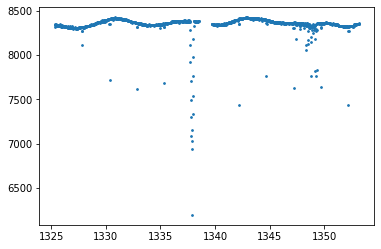

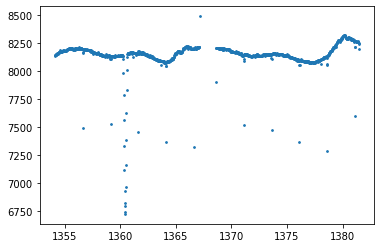

In [89]:
hdul1 = fits.open(cand1)

hdul1.info()
hdul1[0].header
hdul1[2].header
dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
flux1_err = dataset['FLUX_RAW_ERR']
fluxbkg = dataset['FLUX_BKG']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data
quad = dataset['QUALITY']
pix_quad = dataset['PIXEL_QUALITY']
cado = dataset['CADENCENO']
cent1 = dataset['MOM_CENTR1']
cent2 = dataset['MOM_CENTR2']
plt.scatter(time1,flux1, s=3)
plt.show()


hdul2 = fits.open(cand2)
dataset = hdul2[1].data
flux2 = dataset['FLUX_RAW']
flux2_err = dataset['FLUX_RAW_ERR']
fluxbkg2 = dataset['FLUX_BKG']
time2 = dataset['TIME']
sect = hdul2[0].header['SECTOR']
camera = hdul2[0].header['CAMERA']
CCD = hdul2[0].header['CCD']
aperture2 = hdul2[3].data
quad2 = dataset['QUALITY']
pix_quad2 = dataset['PIXEL_QUALITY']
cado2 = dataset['CADENCENO']
cent12 = dataset['MOM_CENTR1']
cent22 = dataset['MOM_CENTR2']


plt.scatter(time2,flux2, s=3)
plt.show()

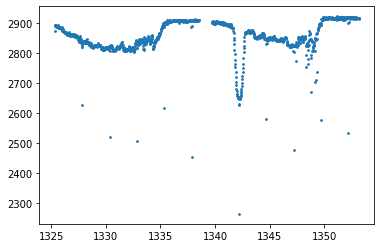

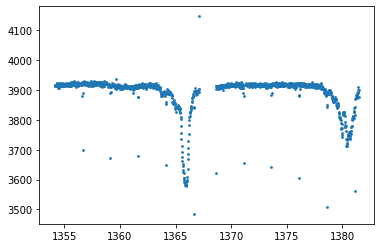

In [90]:
hdul3 = fits.open(cand3)
dataset = hdul3[1].data
flux3 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time3 = dataset['TIME']
cent31 = dataset['MOM_CENTR1']
cent32 = dataset['MOM_CENTR2']
cado3 = dataset['CADENCENO']
plt.scatter(time3,flux3, s=3)
plt.show()


hdul4 = fits.open(cand4)
dataset = hdul4[1].data
flux4 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time4 = dataset['TIME']
cent41 = dataset['MOM_CENTR1']
cent42 = dataset['MOM_CENTR2']
cado4 = dataset['CADENCENO']
plt.scatter(time4,flux4, s=3)
plt.show()

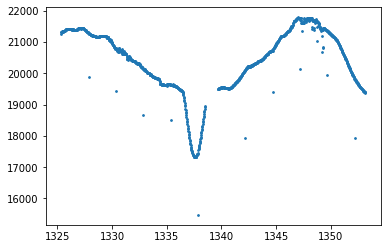

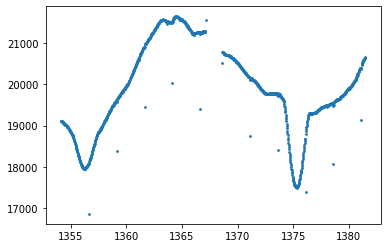

In [91]:
hdul5 = fits.open(cand5)
dataset = hdul5[1].data
flux5 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time5 = dataset['TIME']
cent51 = dataset['MOM_CENTR1']
cent52 = dataset['MOM_CENTR2']
cado5 = dataset['CADENCENO']
plt.scatter(time5,flux5, s=3)
plt.show()


hdul6 = fits.open(cand6)
dataset = hdul6[1].data
flux6 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time6 = dataset['TIME']
cent61 = dataset['MOM_CENTR1']
cent62 = dataset['MOM_CENTR2']
cado6 = dataset['CADENCENO']

plt.scatter(time6,flux6, s=3)
plt.show()

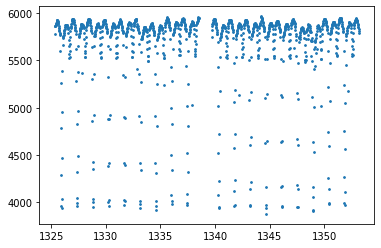

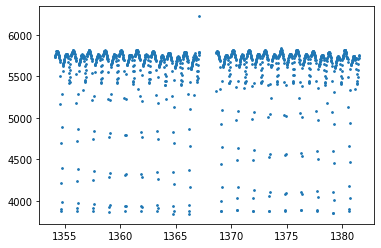

In [92]:
hdul7 = fits.open(cand7)
dataset = hdul7[1].data
flux7 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time7 = dataset['TIME']
cent71 = dataset['MOM_CENTR1']
cent72 = dataset['MOM_CENTR2']
cado7 = dataset['CADENCENO']
plt.scatter(time7,flux7, s=3)
plt.show()


hdul8 = fits.open(cand8)
dataset = hdul8[1].data
flux8 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time8 = dataset['TIME']
cent81 = dataset['MOM_CENTR1']
cent82 = dataset['MOM_CENTR2']
cado8 = dataset['CADENCENO']

plt.scatter(time8,flux8, s=3)
plt.show()

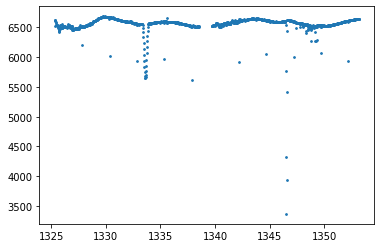

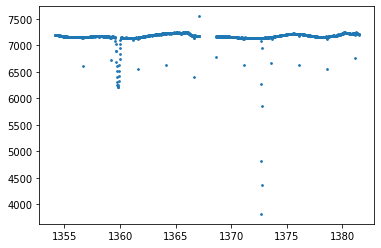

In [93]:
hdul9 = fits.open(cand9)
dataset = hdul9[1].data
flux9 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time9 = dataset['TIME']
cent91 = dataset['MOM_CENTR1']
cent92 = dataset['MOM_CENTR2']
cado9 = dataset['CADENCENO']
plt.scatter(time9,flux9, s=3)
plt.show()


hdul10 = fits.open(cand10)
dataset = hdul10[1].data
flux10 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time10 = dataset['TIME']
cent101 = dataset['MOM_CENTR1']
cent102 = dataset['MOM_CENTR2']
cado10 = dataset['CADENCENO']

plt.scatter(time10,flux10, s=3)
plt.show()

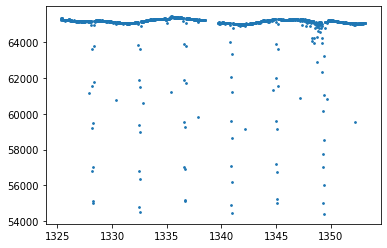

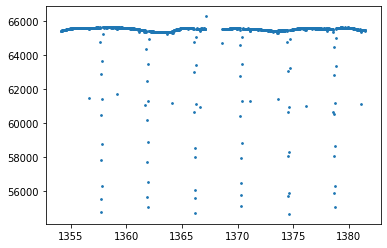

In [94]:
hdul11 = fits.open(cand11)
dataset = hdul11[1].data
flux11 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time11 = dataset['TIME']
cent111 = dataset['MOM_CENTR1']
cent112 = dataset['MOM_CENTR2']
cado11 = dataset['CADENCENO']
plt.scatter(time11,flux11, s=3)
plt.show()


hdul12 = fits.open(cand12)
dataset = hdul12[1].data
flux12 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time12 = dataset['TIME']
cent121 = dataset['MOM_CENTR1']
cent122 = dataset['MOM_CENTR2']
cado12 = dataset['CADENCENO']

plt.scatter(time12,flux12, s=3)
plt.show()

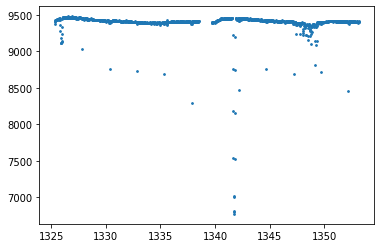

In [95]:
hdul13 = fits.open(cand13)
dataset = hdul13[1].data
flux13 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time13 = dataset['TIME']
cent131 = dataset['MOM_CENTR1']
cent132 = dataset['MOM_CENTR2']
cado13 = dataset['CADENCENO']
plt.scatter(time13,flux13, s=3)
plt.show()


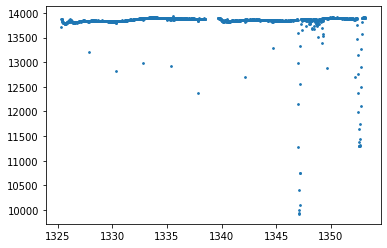

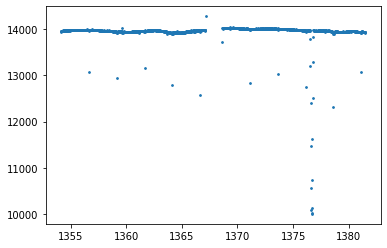

In [96]:
hdul14 = fits.open(cand14)
dataset = hdul14[1].data
flux14 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time14 = dataset['TIME']
cent141 = dataset['MOM_CENTR1']
cent142 = dataset['MOM_CENTR2']
cado14 = dataset['CADENCENO']
plt.scatter(time14,flux14, s=3)
plt.show()


hdul15 = fits.open(cand15)
dataset = hdul15[1].data
flux15 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time15 = dataset['TIME']
cent151 = dataset['MOM_CENTR1']
cent152 = dataset['MOM_CENTR2']
cado15 = dataset['CADENCENO']

plt.scatter(time15,flux15, s=3)
plt.show()

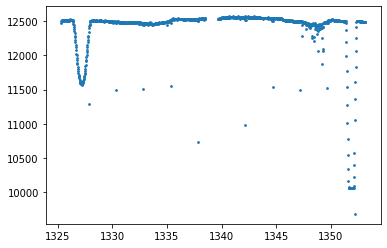

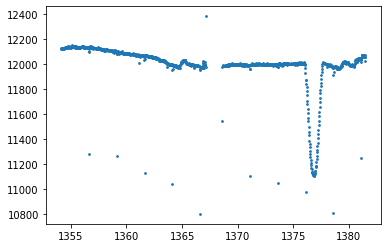

In [97]:
hdul16 = fits.open(cand16)
dataset = hdul16[1].data
flux16 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time16 = dataset['TIME']
cent161 = dataset['MOM_CENTR1']
cent162 = dataset['MOM_CENTR2']
cado16 = dataset['CADENCENO']
plt.scatter(time16,flux16, s=3)
plt.show()


hdul17 = fits.open(cand17)
dataset = hdul17[1].data
flux17 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time17 = dataset['TIME']
cent171 = dataset['MOM_CENTR1']
cent172 = dataset['MOM_CENTR2']
cado17 = dataset['CADENCENO']

plt.scatter(time17,flux17, s=3)
plt.show()

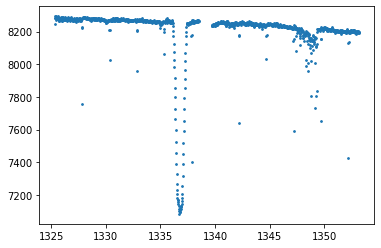

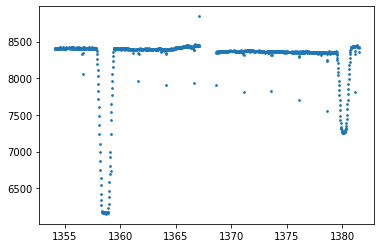

In [98]:
hdul18 = fits.open(cand18)
dataset = hdul18[1].data
flux18 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time18 = dataset['TIME']
cent181 = dataset['MOM_CENTR1']
cent182 = dataset['MOM_CENTR2']
cado18 = dataset['CADENCENO']
plt.scatter(time18,flux18, s=3)
plt.show()


hdul19 = fits.open(cand19)
dataset = hdul19[1].data
flux19 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time19 = dataset['TIME']
cent191 = dataset['MOM_CENTR1']
cent192 = dataset['MOM_CENTR2']
cado19 = dataset['CADENCENO']

plt.scatter(time19,flux19, s=3)
plt.show()

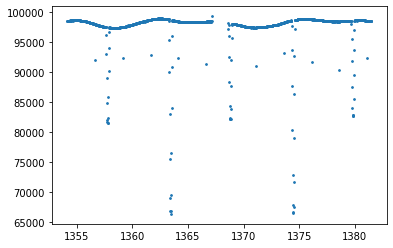

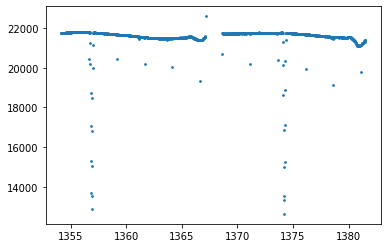

In [99]:
hdul20 = fits.open(cand20)
dataset = hdul20[1].data
flux20 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time20 = dataset['TIME']
cent201 = dataset['MOM_CENTR1']
cent202 = dataset['MOM_CENTR2']
cado20 = dataset['CADENCENO']
plt.scatter(time20,flux20, s=3)
plt.show()


hdul21 = fits.open(cand21)
dataset = hdul21[1].data
flux21 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time21 = dataset['TIME']
cent211 = dataset['MOM_CENTR1']
cent212 = dataset['MOM_CENTR2']
cado21 = dataset['CADENCENO']

plt.scatter(time21,flux21, s=3)
plt.show()

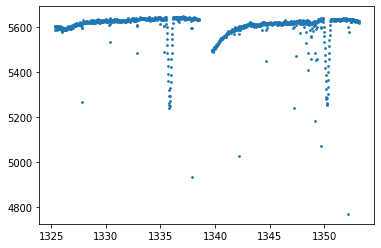

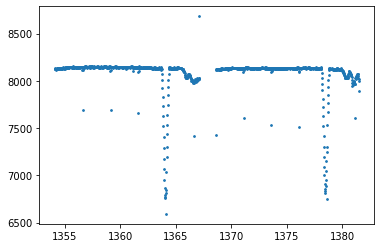

In [100]:
hdul22 = fits.open(cand22)
dataset = hdul22[1].data
flux22 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time22 = dataset['TIME']
cent221 = dataset['MOM_CENTR1']
cent222 = dataset['MOM_CENTR2']
cado22 = dataset['CADENCENO']
plt.scatter(time22,flux22, s=3)
plt.show()


hdul23 = fits.open(cand23)
dataset = hdul23[1].data
flux23 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time23 = dataset['TIME']
cent231 = dataset['MOM_CENTR1']
cent232 = dataset['MOM_CENTR2']
cado23 = dataset['CADENCENO']

plt.scatter(time23,flux23, s=3)
plt.show()

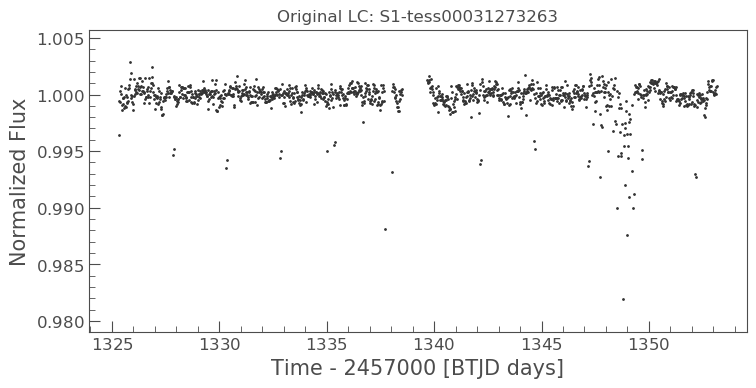

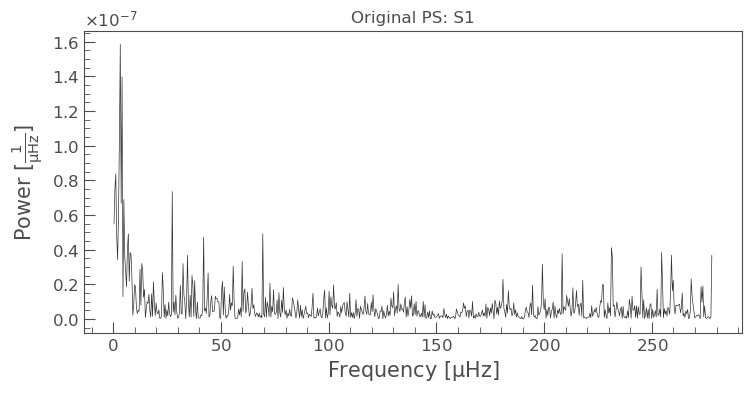

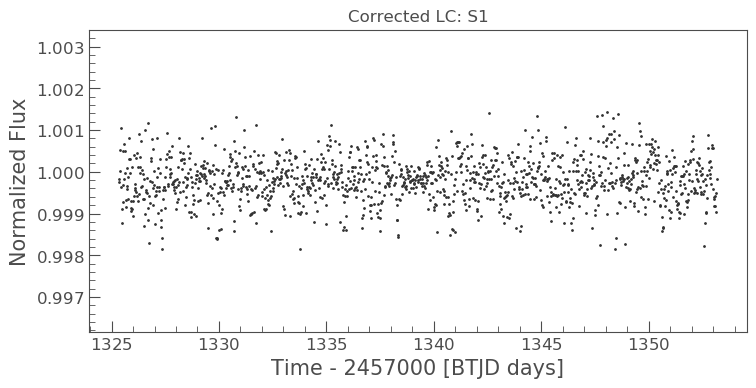

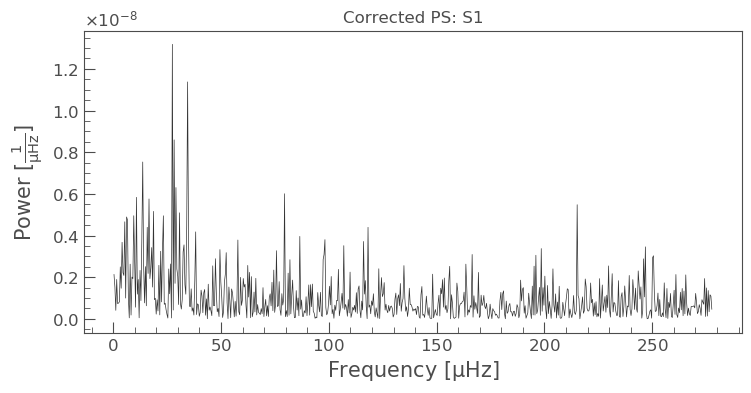

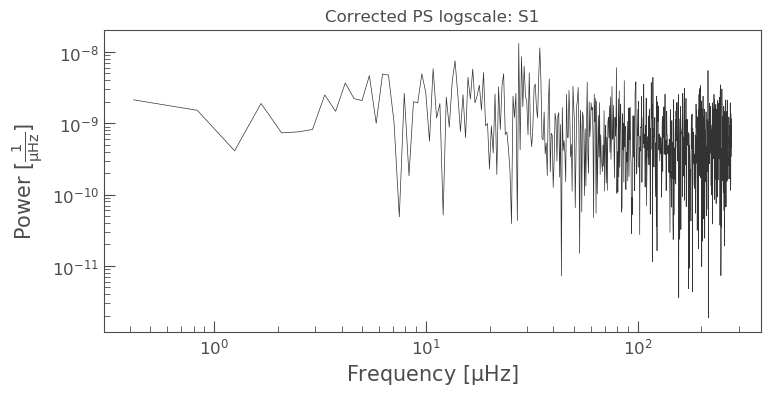

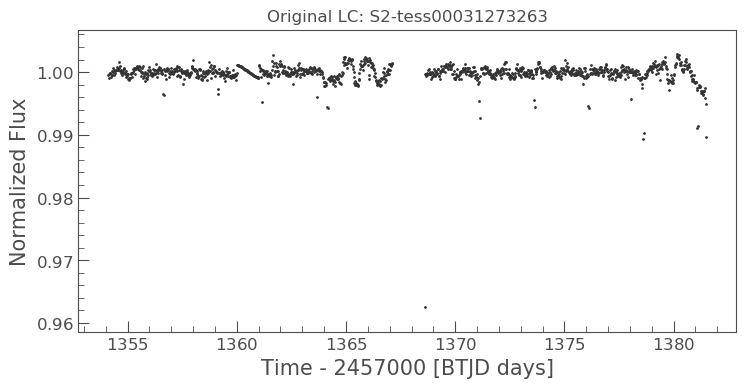

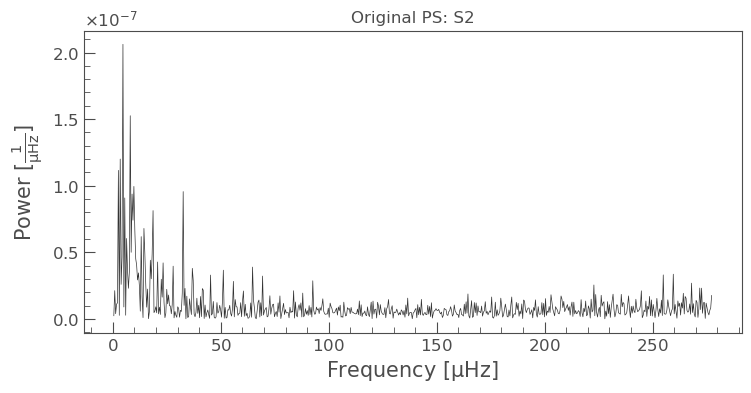

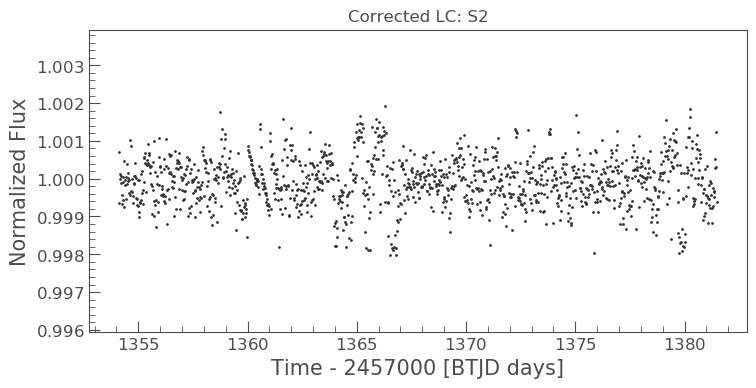

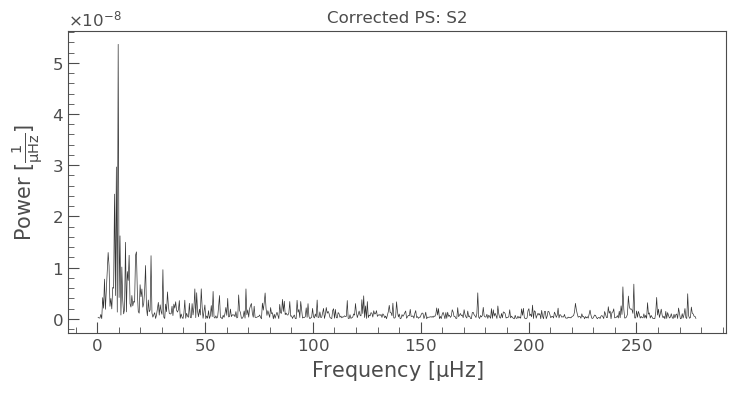

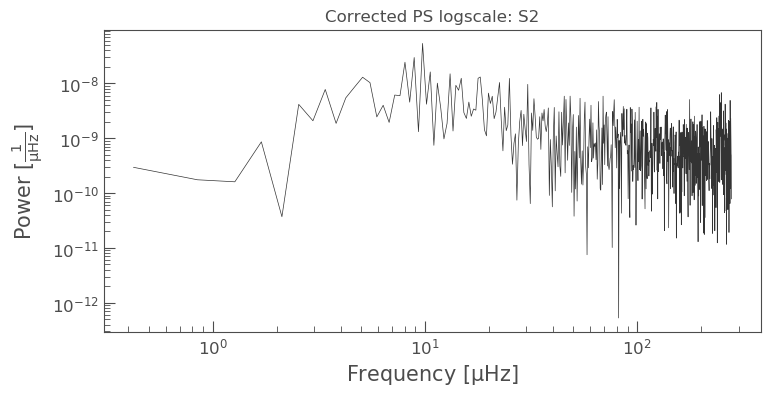

Text(0.5, 1.0, 'Combined Power Logged')

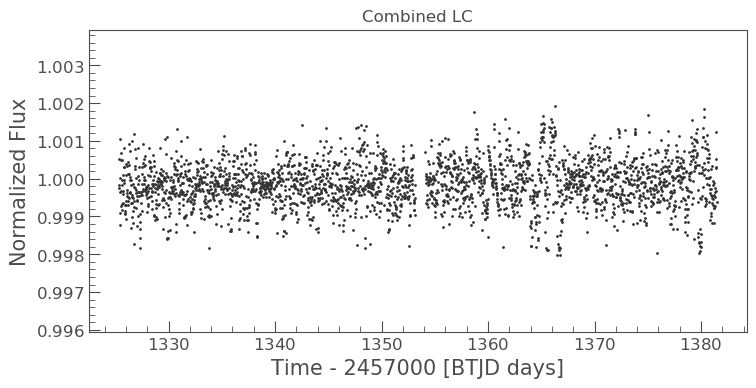

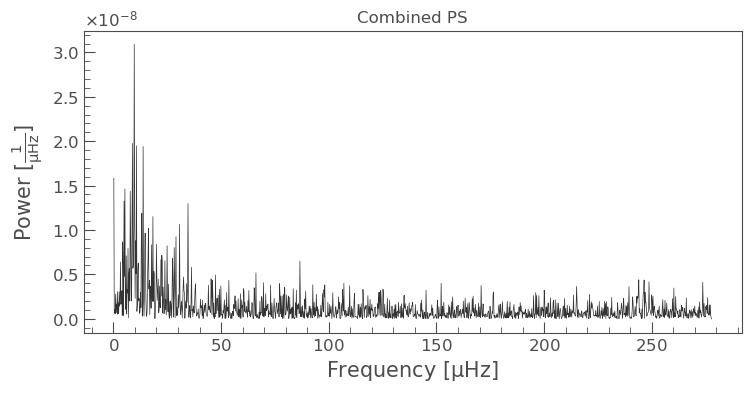

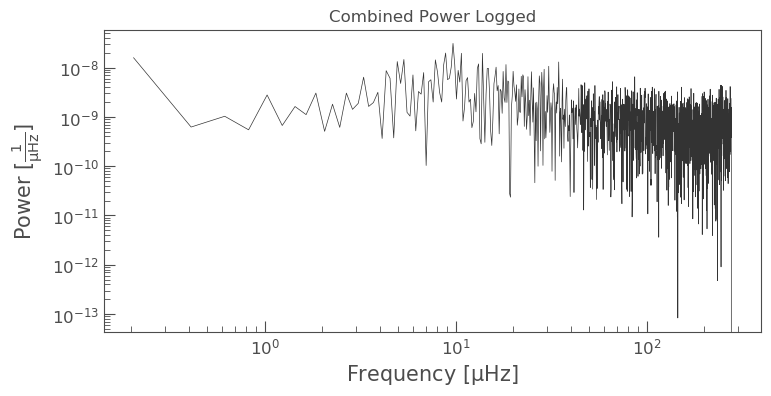

In [46]:
#SECTOR 1
#Cut eclipse and large systematic errors
condition = ((time1 > 1347) & (time1 < 1350) & (time1 > 1337.5) & (time1 < 1338.5))
flux1[condition] = np.median(flux1)

#create lightcurve, periodogram, power spectrum and plot all
model1 = lk.TessLightCurve(time1,flux1,centroid_col = cent2, centroid_row = cent1, cadenceno= cado).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model1.scatter()
plt.title('Original LC: S1-tess00031273263')
plt.show()
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
plt.title('Original PS: S1')
plt.show()

#Correct model using SFF and plot, then redo the periodogram, power spectrum and plot all
corrected_lc1 = model1.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc1.scatter()
plt.title('Corrected LC: S1')
corr_power1 =corrected_lc1.to_periodogram(method='lombscargle', normalization="psd")
corr_power1.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power1.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



#SECTOR 2
#cut eclipse and large systematic errors if needed
conditions = ((time2 > 1360) & (time2 < 1361))
flux2[conditions] = np.median(flux2)

#create lightcurve, periodogram, power spectrum and plot all
model2 = lk.TessLightCurve(time2,flux2, centroid_col = cent22, centroid_row = cent12, cadenceno= cado2).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model2.scatter()
plt.title('Original LC: S2-tess00031273263')
plt.show()
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
power2.plot()
plt.title('Original PS: S2')
plt.show()


#Correct model using SFF and plot, then redo the periodogram, power spectrum and plot all
corrected_lc2 = model2.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc2.scatter()
plt.title('Corrected LC: S2')
corr_power2 =corrected_lc2.to_periodogram(method='lombscargle', normalization="psd")
corr_power2.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power2.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()



#Combine both corrected lightcurves to see potential oscillations
combined = corrected_lc1.append(corrected_lc2)
#combined = combined.fold(period=27)
combined.scatter()
plt.title('Combined LC')
combined_power = combined.to_periodogram(method='lombscargle', normalization="psd")
combined_power.plot()
plt.title('Combined PS')
combined_power.plot(scale='log')
plt.title('Combined Power Logged')


#With estimated calculations: v_max ~ 400 microHz.... not a candidate for us




#All other candidates follow the same process below



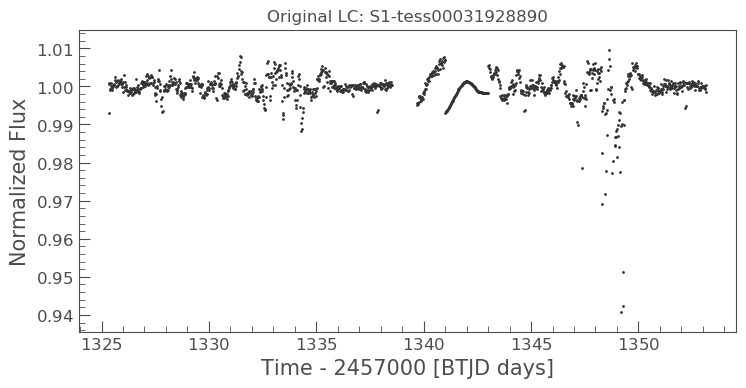

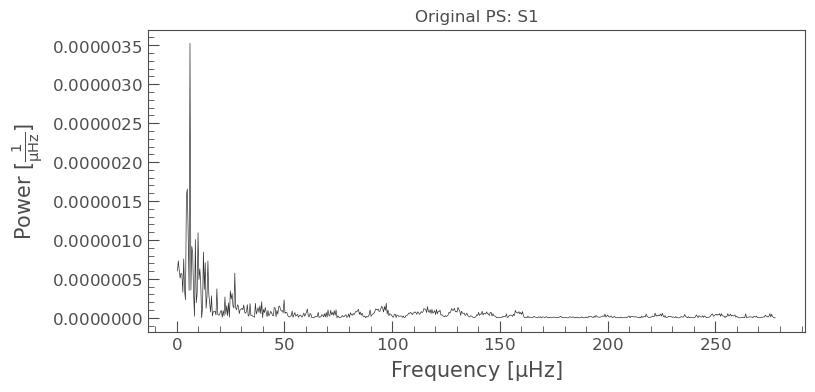

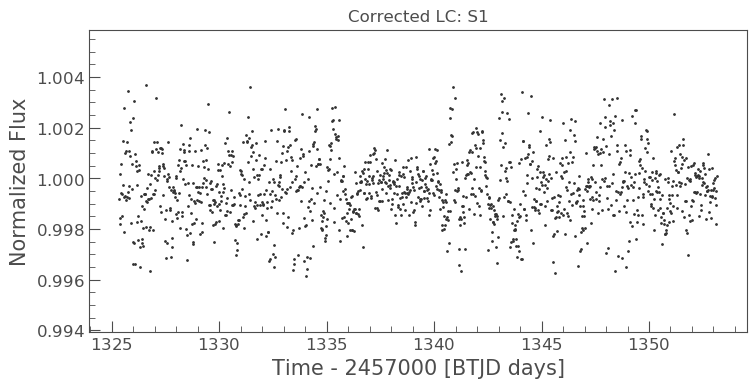

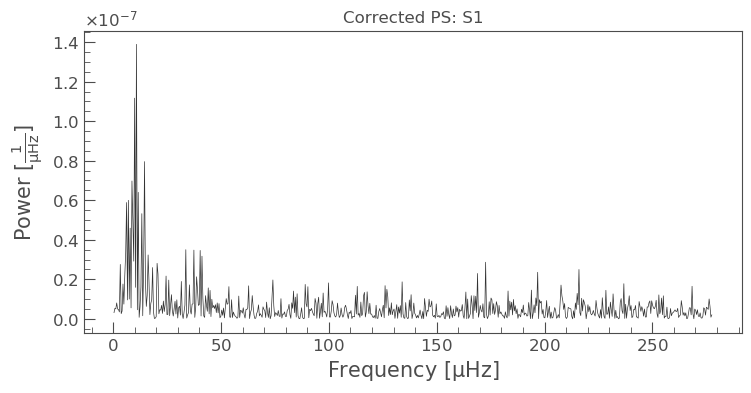

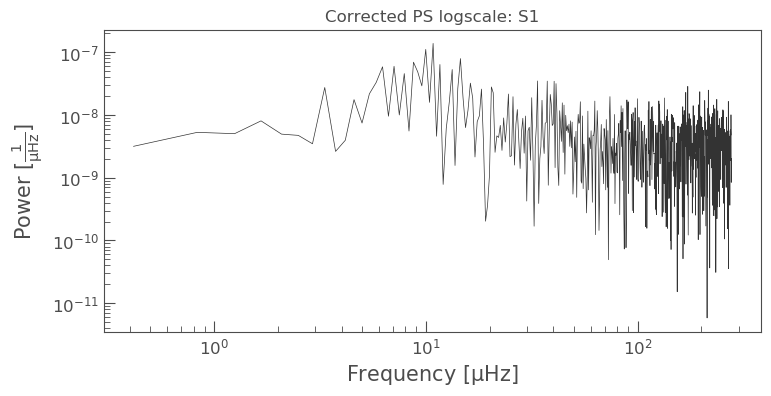

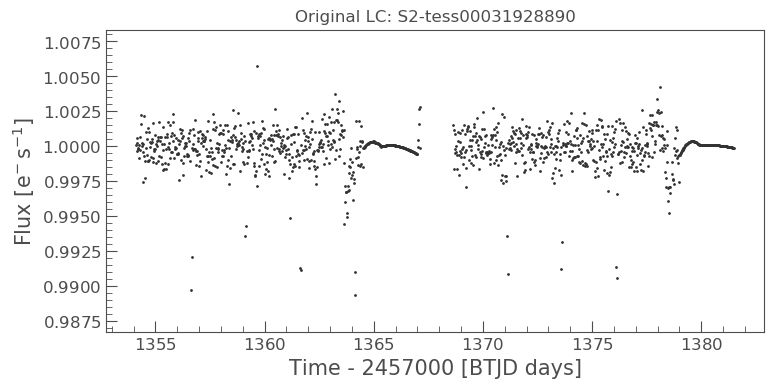

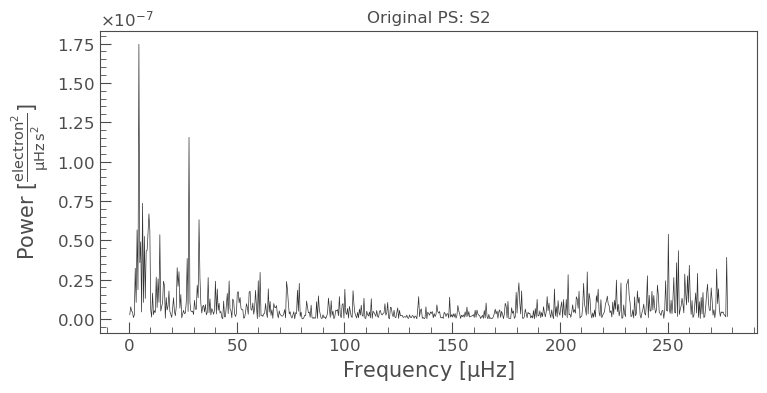

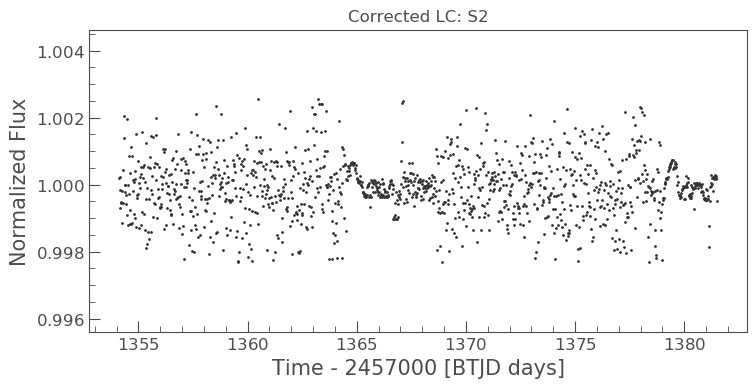

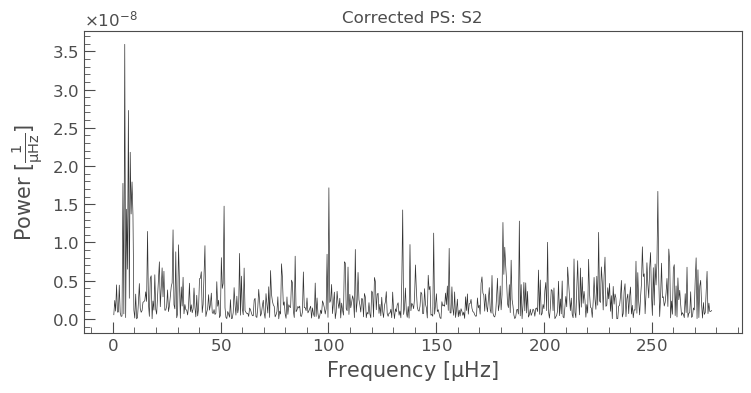

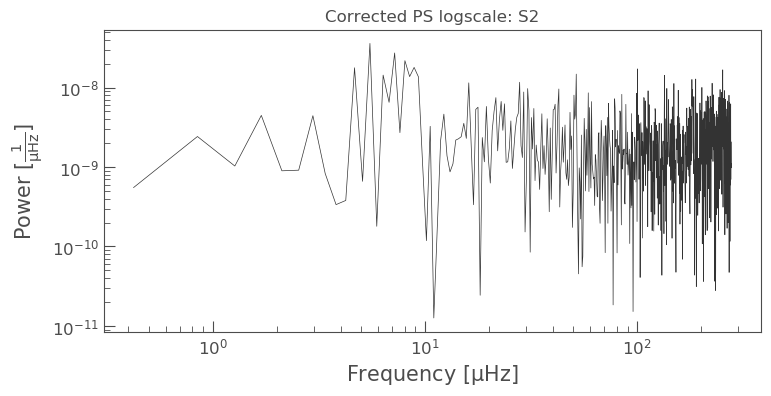

Text(0.5, 1.0, 'Combined Power Logged')

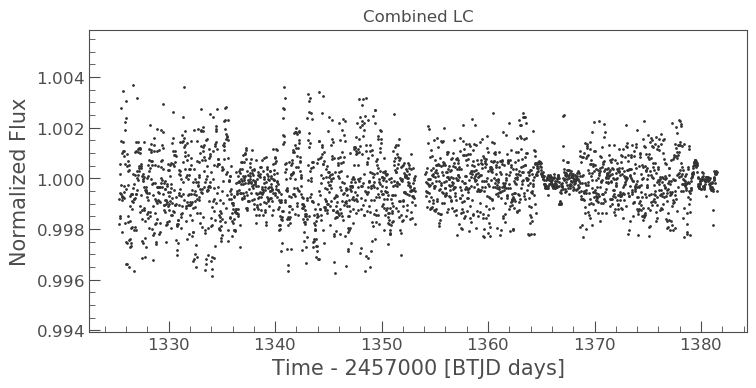

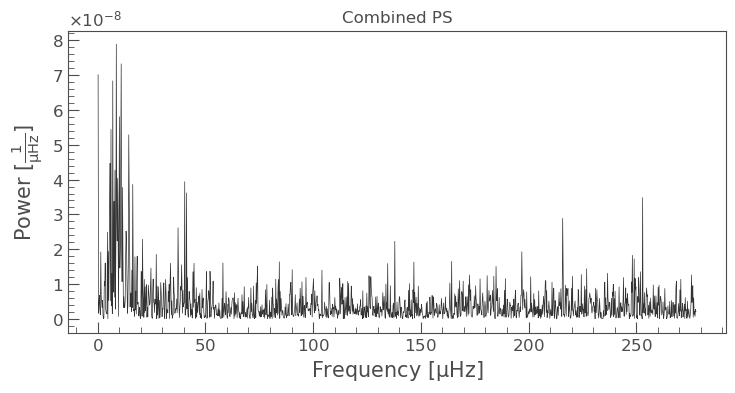

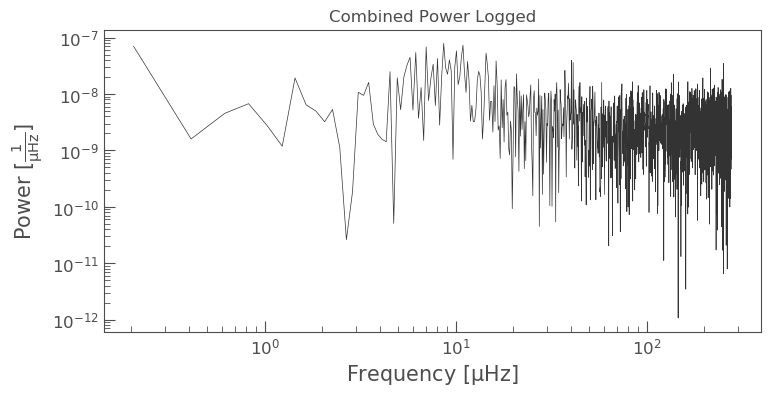

In [47]:
#SECTOR 1
conditionss = ((time3 > 1346.5) & (time3 < 1350.5))
conditionss =((time3 > 1341) & (time3 < 1343))
flux3[conditionss] = np.mean(flux3)

model3 = lk.TessLightCurve(time3,flux3,centroid_col = cent32, centroid_row = cent31, cadenceno = cado3).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model3.scatter()
plt.title('Original LC: S1-tess00031928890')
plt.show()
power3 = model3.to_periodogram(method='lombscargle', normalization="psd")
power3.plot()
plt.title('Original PS: S1')
plt.show()


corrected_lc3 = model3.to_corrector("sff").correct(windows=10).remove_outliers(sigma_upper=3, sigma_lower=2.5).fill_gaps()
corrected_lc3.scatter()
plt.title('Corrected LC: S1')
corr_power3 =corrected_lc3.to_periodogram(method='lombscargle', normalization="psd")
corr_power3.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power3.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



#SECTOR 2
conditionsss = ((time4 > 1364.5) & (time4 < 1367))
conditionsss |= ((time4 > 1379) & (time4 < 1382))
flux4[conditionsss] = np.mean(flux4)

model4 = lk.TessLightCurve(time4,flux4, centroid_col = cent42, centroid_row = cent41, cadenceno = cado4).remove_nans().remove_outliers().flatten(window_length=145)
model4.scatter()
plt.title('Original LC: S2-tess00031928890')
plt.show()
power4 = model4.to_periodogram(method='lombscargle', normalization="psd")
power4.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc4 = model4.to_corrector("sff").correct(windows=10).remove_outliers(sigma_upper=3, sigma_lower=2.5).fill_gaps()
corrected_lc4.scatter()
plt.title('Corrected LC: S2')
corr_power4 =corrected_lc4.to_periodogram(method='lombscargle', normalization="psd")
corr_power4.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power4.plot(scale='log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined2 = corrected_lc3.append(corrected_lc4)
#combined2 = combined2.fold(period=27)
combined2.scatter()
plt.title('Combined LC')
combined_power2 = combined2.to_periodogram(method='lombscargle', normalization="psd")
combined_power2.plot()
plt.title('Combined PS')
combined_power2.plot(scale='log')
plt.title('Combined Power Logged')



#with estimated calculations: v_max ~ 246 microhertz - MAYBE in the sector two lightcurve set with no eclipse present or MAYBE 
#in the combined lightcurve set

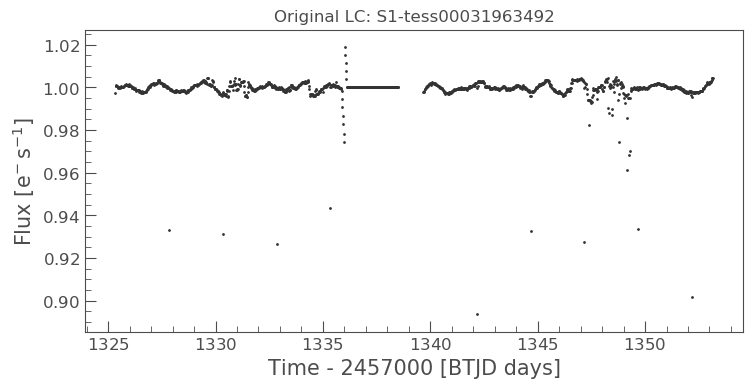

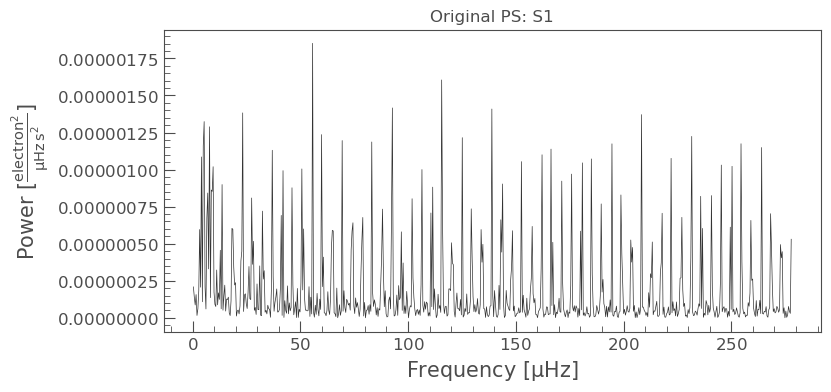

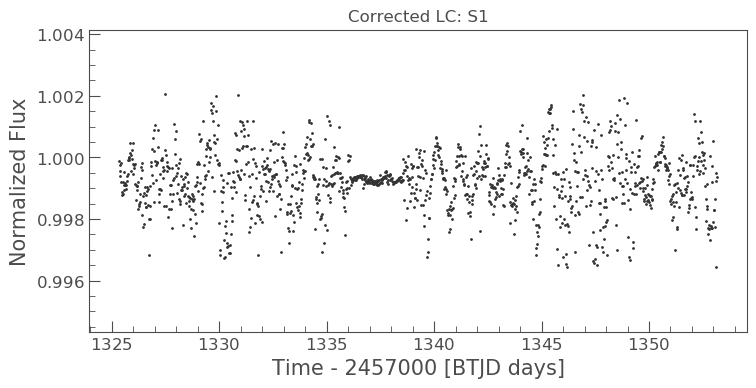

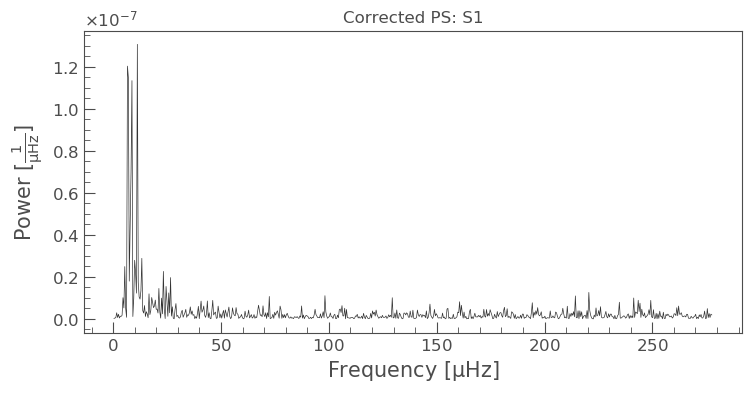

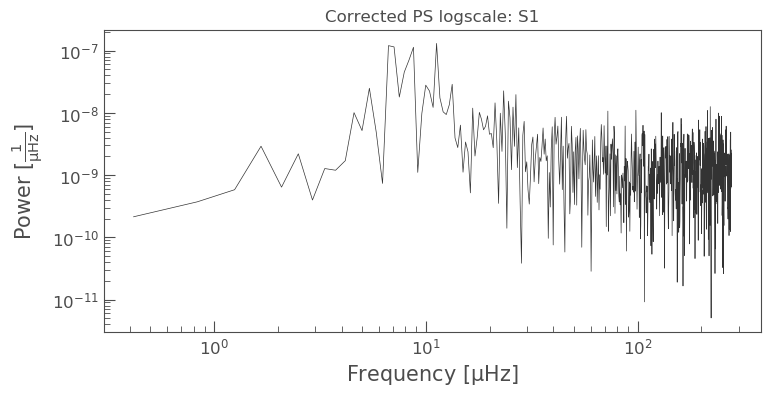

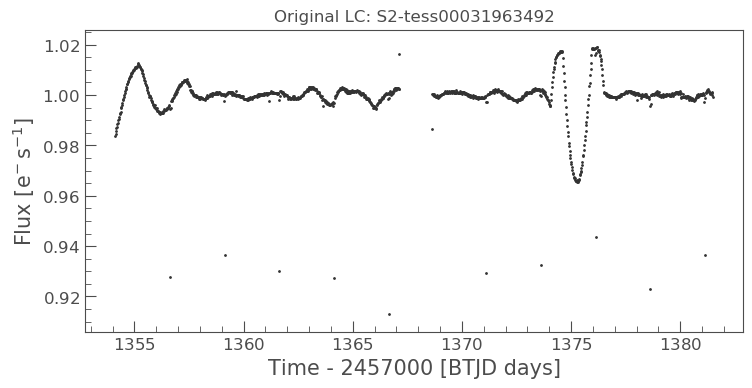

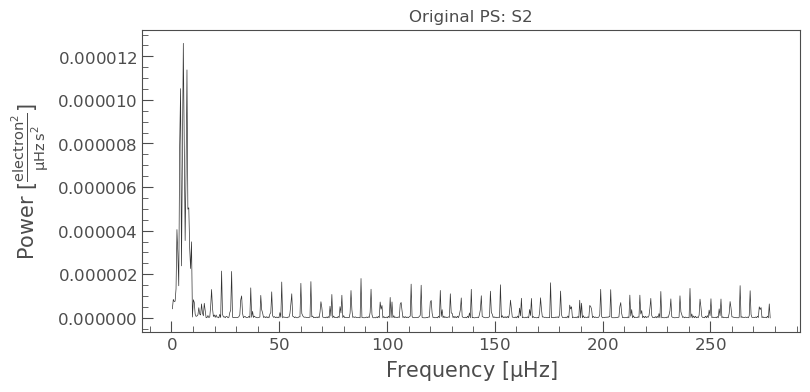

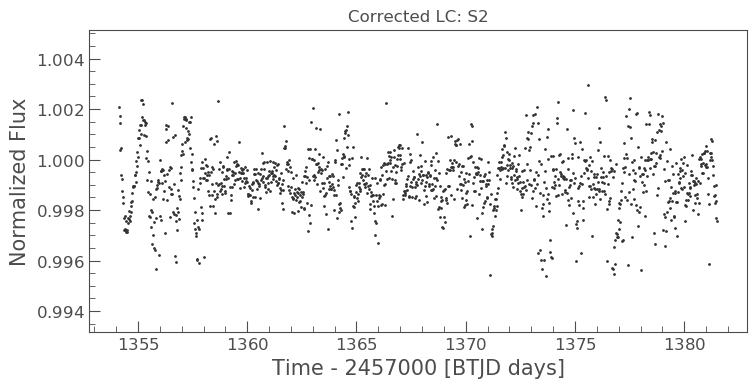

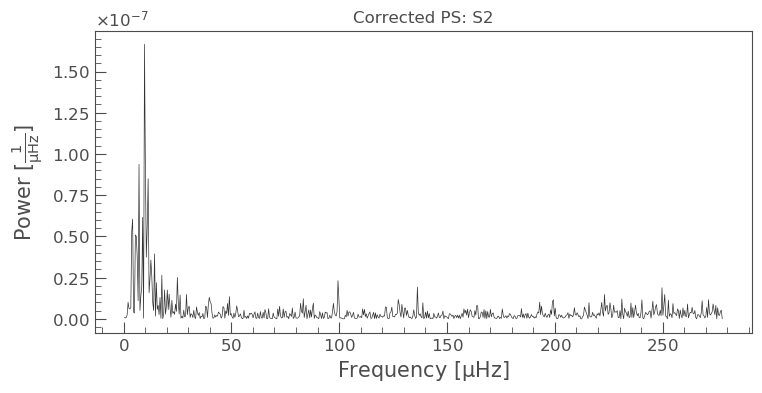

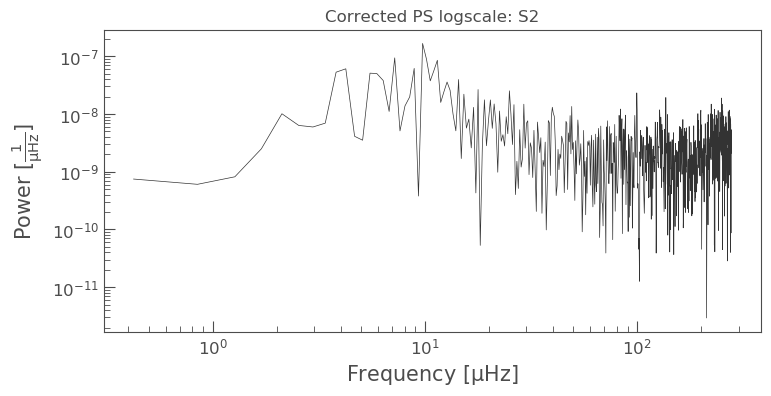

Text(0.5, 1.0, 'Combined Power Logged')

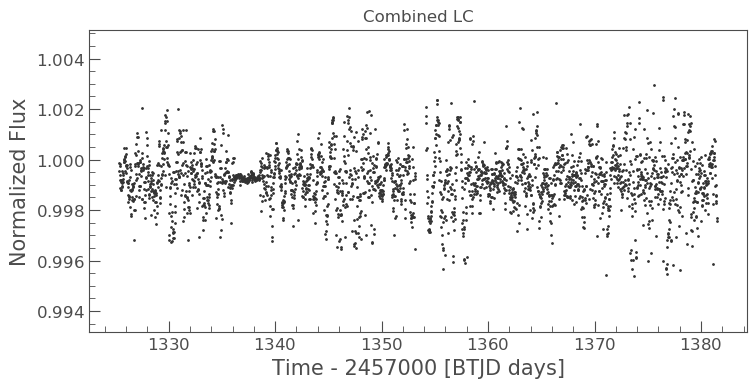

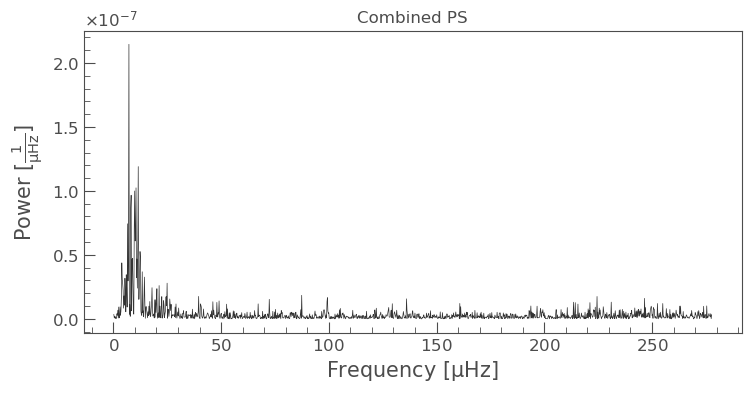

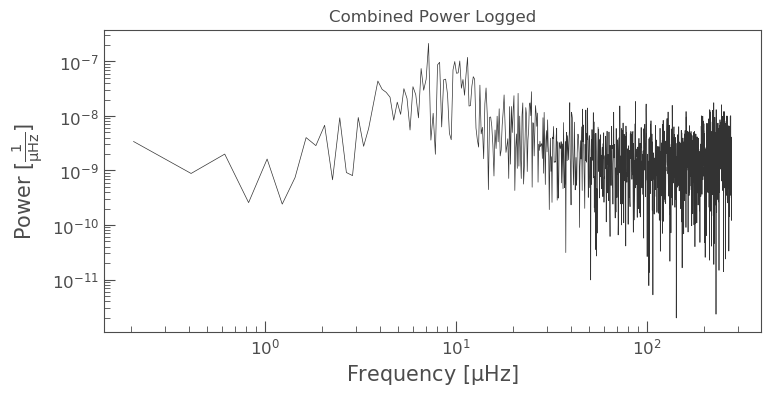

In [48]:
#SECTOR 1
cond = ((time5 > 1347) & (time5 < 1350))
cond = ((time5 > 1336) & (time5 < 1339))
flux5[cond] = np.median(flux5)


model5 = lk.TessLightCurve(time5,flux5,centroid_col = cent52, centroid_row = cent51, cadenceno = cado5).remove_nans().remove_outliers().flatten(window_length=145)
model5.scatter()
plt.title('Original LC: S1-tess00031963492')
plt.show()
power5 = model5.to_periodogram(method='lombscargle', normalization="psd")
power5.plot()
plt.title('Original PS: S1')
plt.show()


corrected_lc5 = model5.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc5.scatter()
plt.title('Corrected LC: S1')
corr_power5 =corrected_lc5.to_periodogram(method='lombscargle', normalization="psd")
corr_power5.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power5.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()

#SECTOR 2
conds = ((time6 < 1374) & (time6 > 1376.5))
flux6[conds] = np.median(flux6)

model6 = lk.TessLightCurve(time6,flux6, centroid_col = cent62, centroid_row = cent61, cadenceno=cado6).remove_nans().remove_outliers().flatten(window_length=145)
model6.scatter()
plt.title('Original LC: S2-tess00031963492')
plt.show()
power6 = model6.to_periodogram(method='lombscargle', normalization="psd")
power6.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc6 = model6.to_corrector("sff").correct(windows=10).remove_outliers(sigma_upper=3, sigma_lower=3).fill_gaps()
corrected_lc6.scatter()
plt.title('Corrected LC: S2')
corr_power6 =corrected_lc6.to_periodogram(method='lombscargle', normalization="psd")
corr_power6.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power6.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined3 = corrected_lc5.append(corrected_lc6)
#combined3 = combined3.fold(period=27).remove_nans()
combined3.scatter()
plt.title('Combined LC')
combined_power3 = combined3.to_periodogram(method='lombscargle', normalization="psd")
combined_power3.plot()
plt.title('Combined PS')
combined_power3.plot(scale='log')
plt.title('Combined Power Logged')


#with estimated calculations: v_max ~ 26.98 microhertz, possible candidate, but original lightcurve may be hard to 'clean up'
#to see the oscillations

#corrected power spectrums for sector one and two and combined shows a peak around 25 microhertz, but I do not know if real
#It is characteristic of TESS data to have peaks in that range. Still pretty messy as it stands

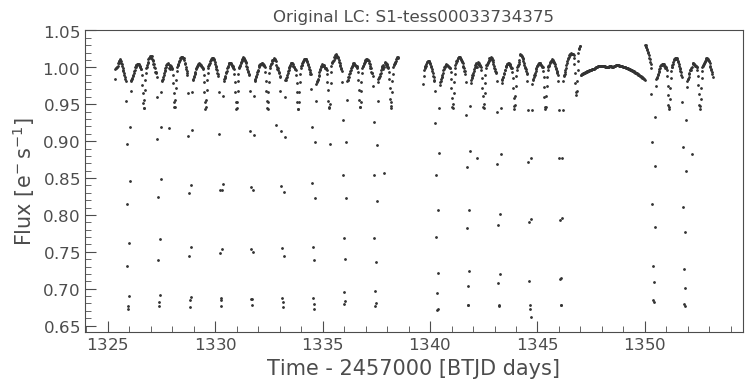

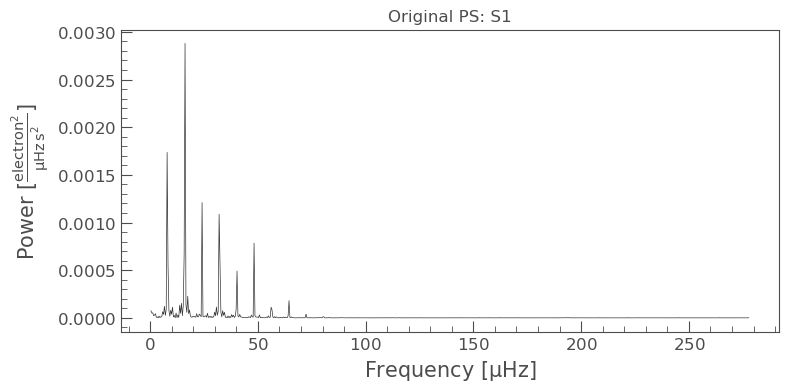

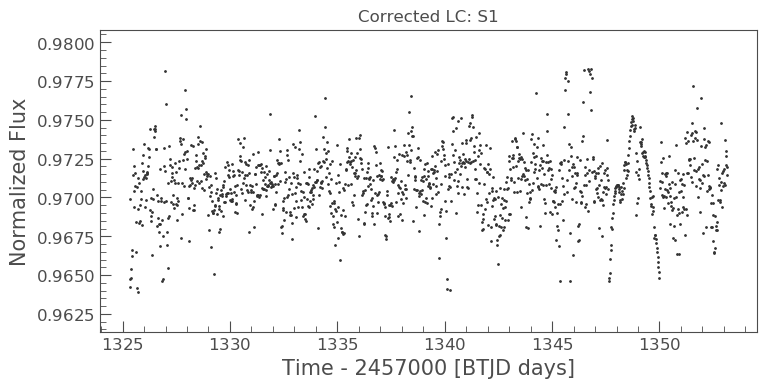

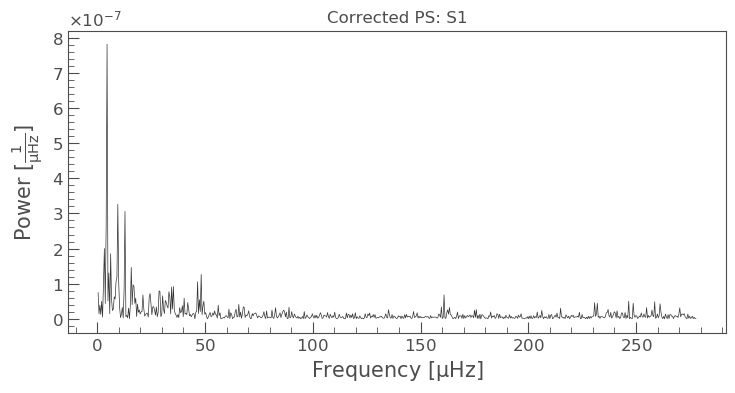

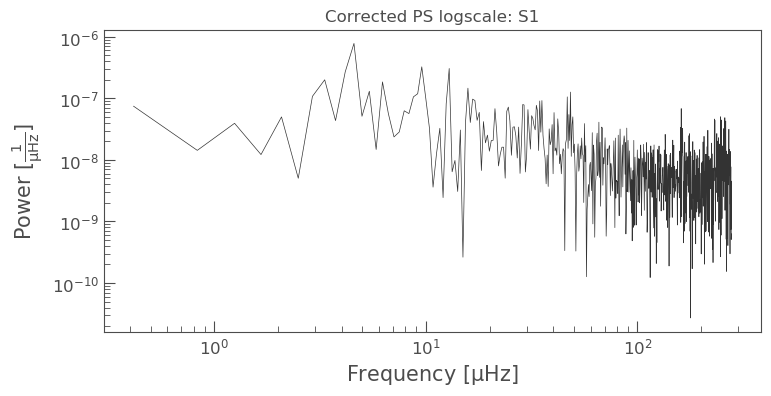

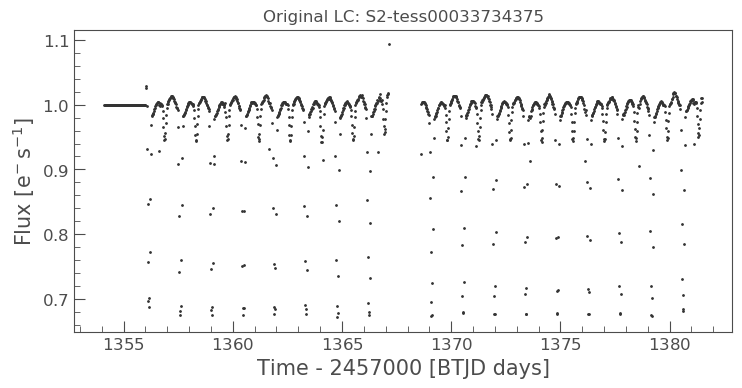

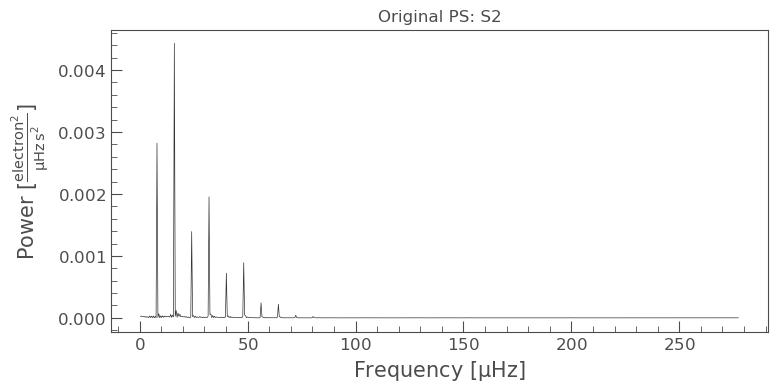

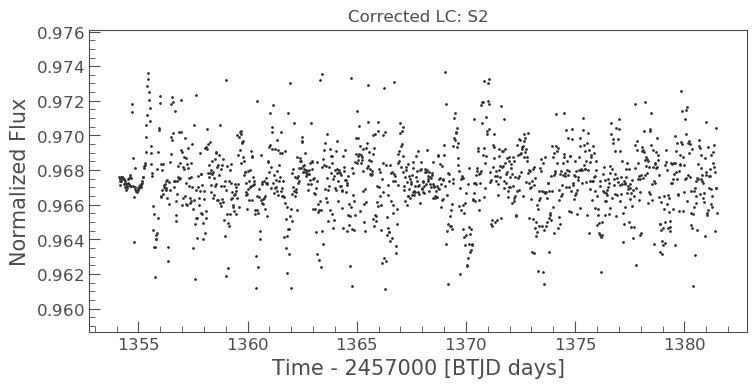

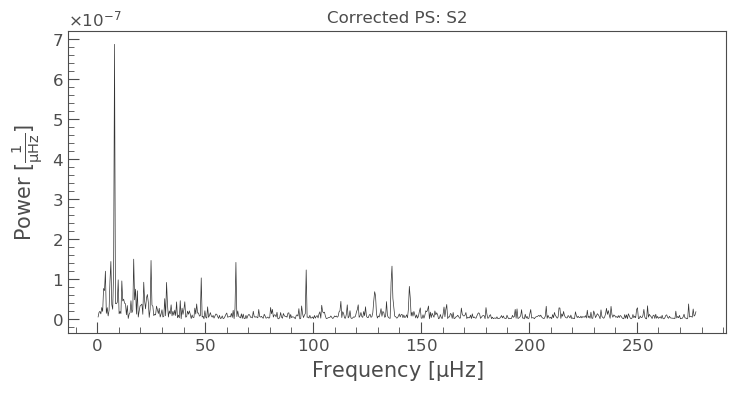

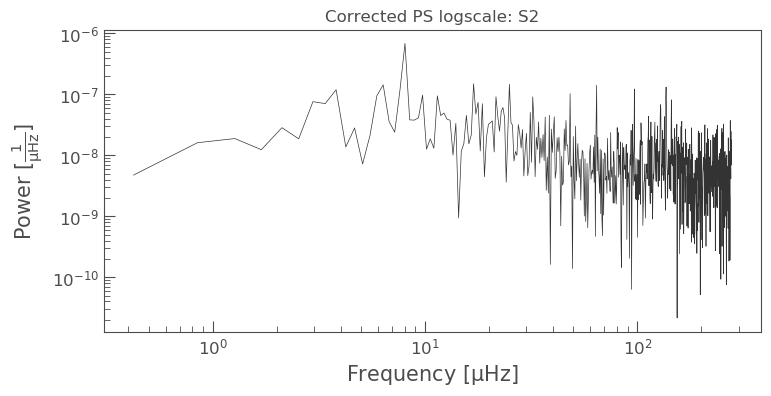

Text(0.5, 1.0, 'Combined Power Logged')

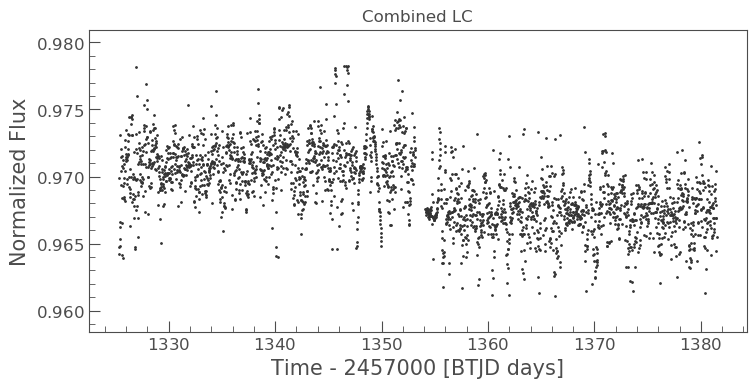

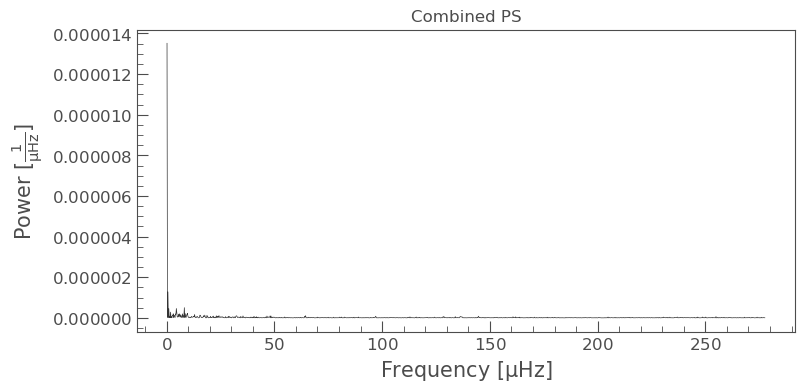

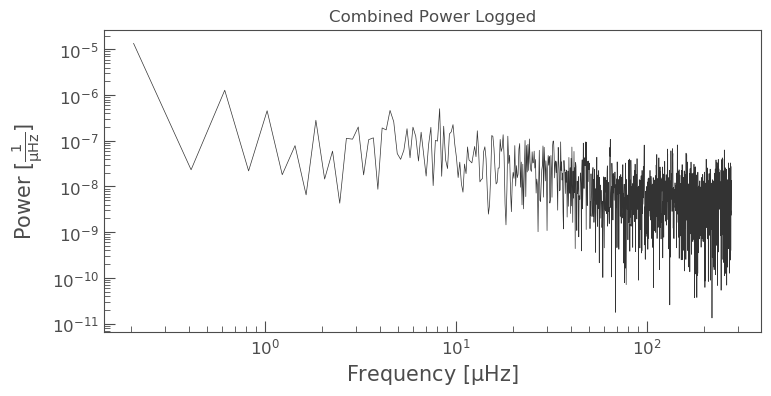

In [49]:
#SECTOR 1
#really not necessary... not going to be a real candidate
condss = ((time7 > 1347) & (time7 < 1350))
flux7[condss] = np.mean(flux7)

model7 = lk.TessLightCurve(time7,flux7,centroid_col = cent72, centroid_row = cent71, cadenceno=cado7).remove_nans().remove_outliers().flatten(window_length=145)
model7.scatter()
plt.title('Original LC: S1-tess00033734375')
plt.show()
power7 = model7.to_periodogram(method='lombscargle', normalization="psd")
power7.plot()
plt.title('Original PS: S1')
plt.show()

corrected_lc7 = model7.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc7.scatter()
plt.title('Corrected LC: S1')
corr_power7 =corrected_lc7.to_periodogram(method='lombscargle', normalization="psd")
corr_power7.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power7.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()


#SECTOR 2
cond8 = ((time8 > 1350) & (time8 < 1356))
flux8[cond8] = np.mean(flux8)

model8 = lk.TessLightCurve(time8,flux8, centroid_col = cent82, centroid_row = cent81, cadenceno=cado8).remove_nans().remove_outliers().flatten(window_length=145)
model8.scatter()
plt.title('Original LC: S2-tess00033734375')
plt.show()
power8 = model8.to_periodogram(method='lombscargle', normalization="psd")
power8.plot()
plt.title('Original PS: S2')
plt.show()

corrected_lc8 = model8.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc8.scatter()
plt.title('Corrected LC: S2')
corr_power8 =corrected_lc8.to_periodogram(method='lombscargle', normalization="psd")
corr_power8.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power8.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()



#Now to combine and see
combined4 = corrected_lc7.append(corrected_lc8)
combined4.scatter()
plt.title('Combined LC')
combined_power4 = combined4.to_periodogram(method='lombscargle', normalization="psd")
combined_power4.plot()
plt.title('Combined PS')
combined_power4.plot(scale='log')
plt.title('Combined Power Logged')



#Not a likely candidate eventhough stellar parameters indicate so
##with estimated calculations: v_max ~ 25.91 microhertz

#Not sure what is happening. When looking at the corrected power spectrums, It almost seems that there are oscillations
#around 200 microhertz...

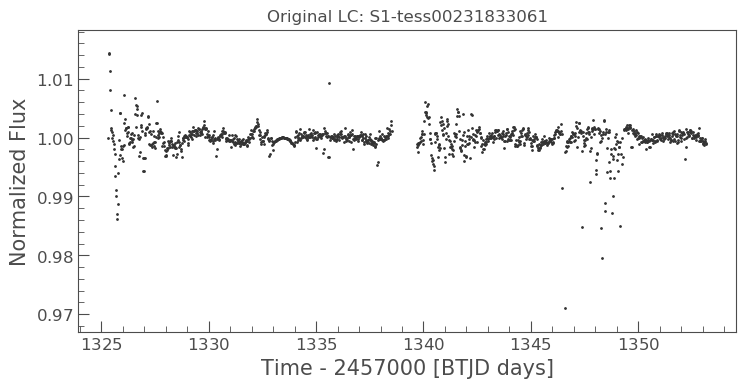

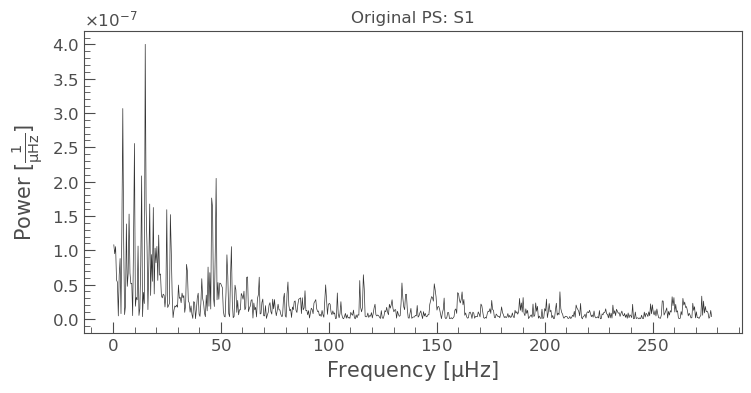

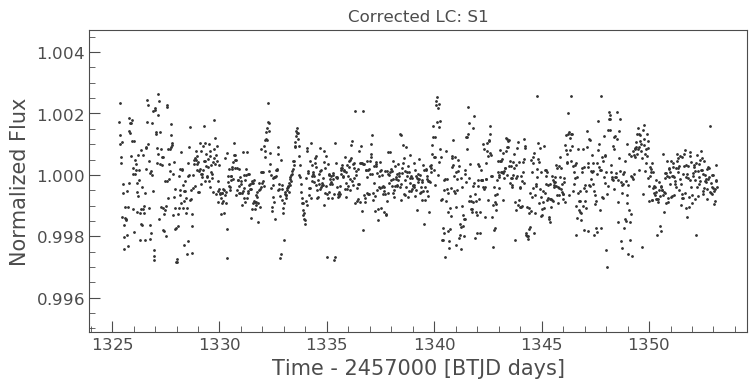

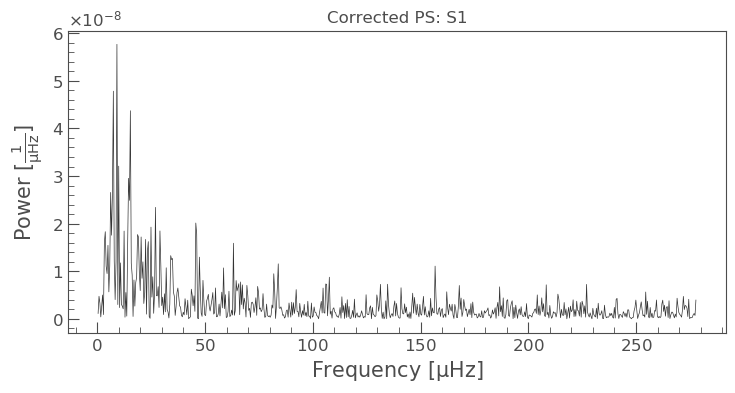

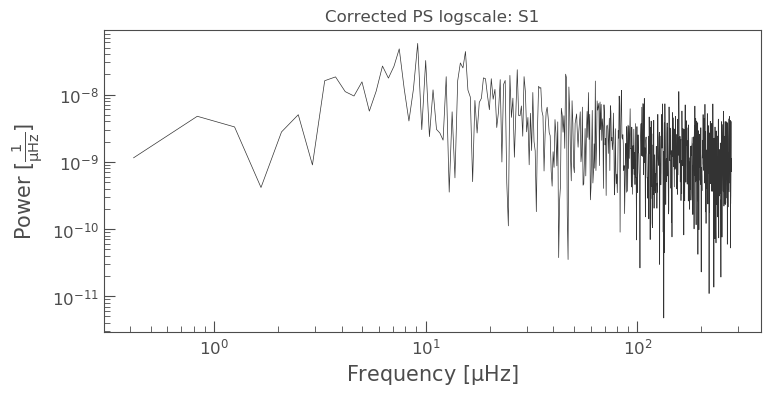

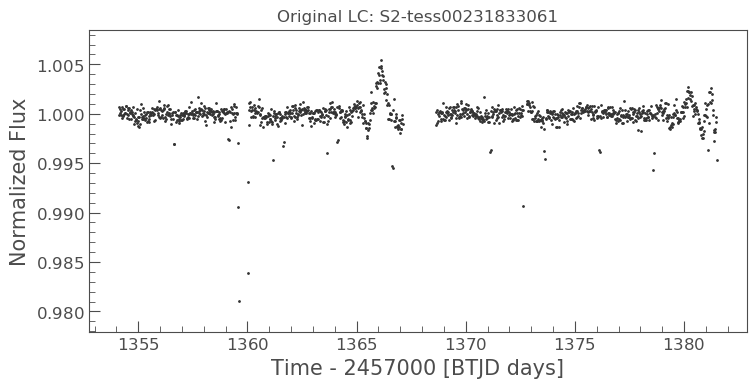

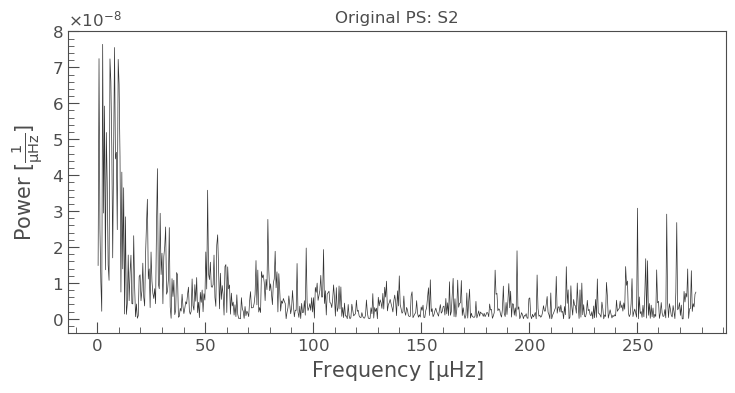

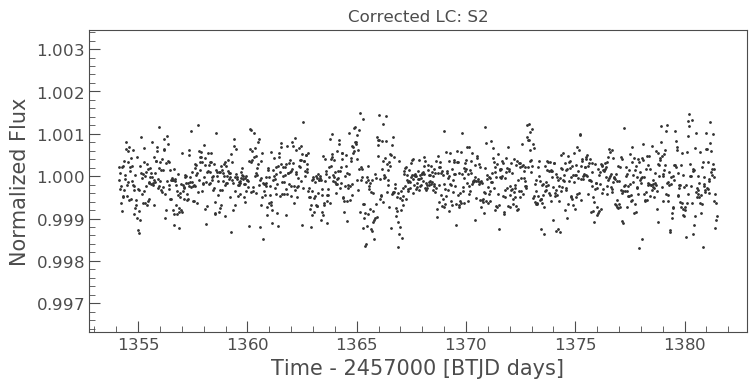

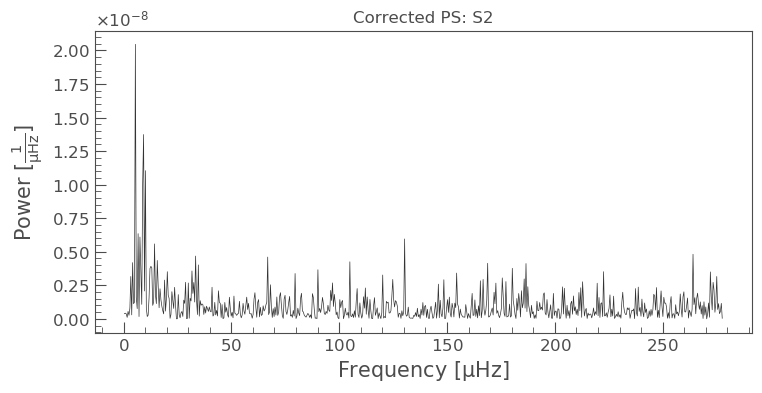

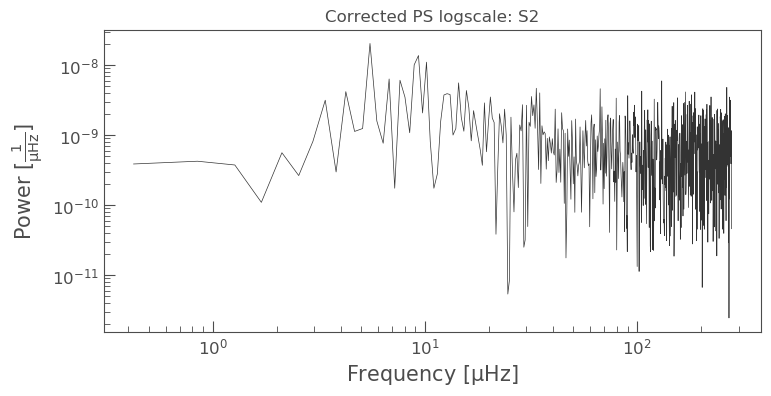

Text(0.5, 1.0, 'Combined Power Logged')

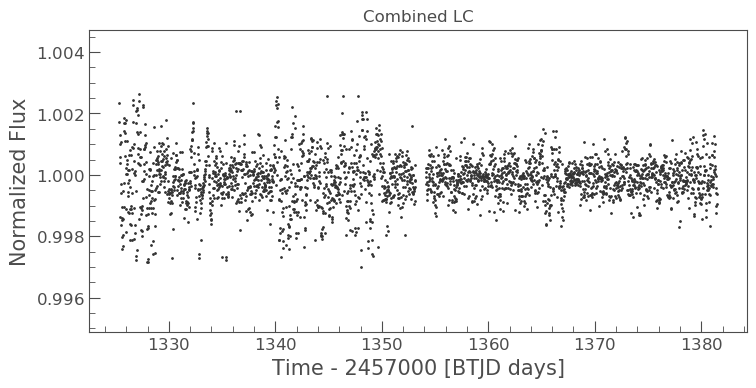

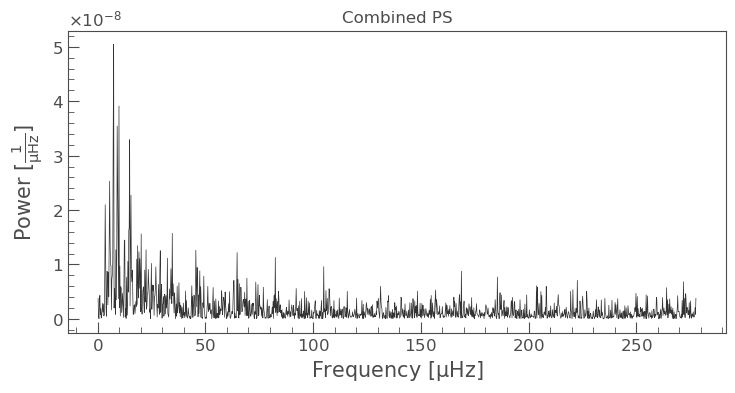

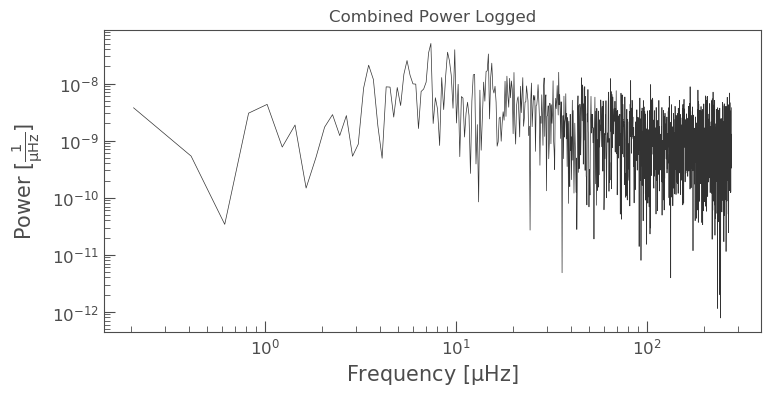

In [50]:
#SECTOR 1
cons = ((time9 > 1347) & (time9 < 1350))
cons = ((time9 > 1333) & (time9 < 1334))
flux9[cons] = np.mean(flux9)
model9 = lk.TessLightCurve(time9,flux9,centroid_col = cent92, centroid_row = cent91, cadenceno=cado9).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model9.scatter()
plt.title('Original LC: S1-tess00231833061')
plt.show()
power9 = model9.to_periodogram(method='lombscargle', normalization="psd")
power9.plot()
plt.title('Original PS: S1')
plt.show()

corrected_lc9 = model9.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc9.scatter()
plt.title('Corrected LC: S1')
corr_power9 =corrected_lc9.to_periodogram(method='lombscargle', normalization="psd")
corr_power9.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power9.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



#SECTOR 2
conss = ((time10 < 1359) & (time10 > 1360))
flux10[conss] = np.mean(flux10)

model10 = lk.TessLightCurve(time10,flux10, centroid_col = cent102, centroid_row = cent101, cadenceno=cado10).normalize().remove_nans().remove_outliers().flatten(window_length=145)
model10.scatter()
plt.title('Original LC: S2-tess00231833061')
plt.show()
power10 = model10.to_periodogram(method='lombscargle', normalization="psd")
power10.plot()
plt.title('Original PS: S2')
plt.show()

corrected_lc10 = model10.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc10.scatter()
plt.title('Corrected LC: S2')
corr_power10 =corrected_lc10.to_periodogram(method='lombscargle', normalization="psd")
corr_power10.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power10.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined5 = corrected_lc9.append(corrected_lc10)
#combined5 = combined5.fold(period=27)
combined5.scatter()
plt.title('Combined LC')
combined_power5 = combined5.to_periodogram(method='lombscargle', normalization="psd")
combined_power5.plot()
plt.title('Combined PS')
combined_power5.plot(scale='log')
plt.title('Combined Power Logged')


#with estimated calculations: v_max ~ 2325 microhertz
#not a possible candidate for us

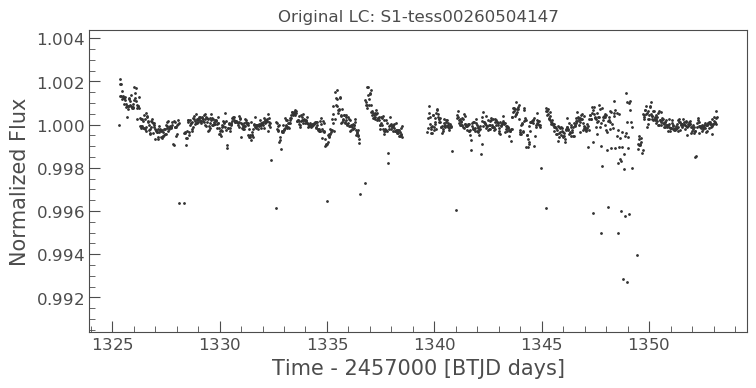

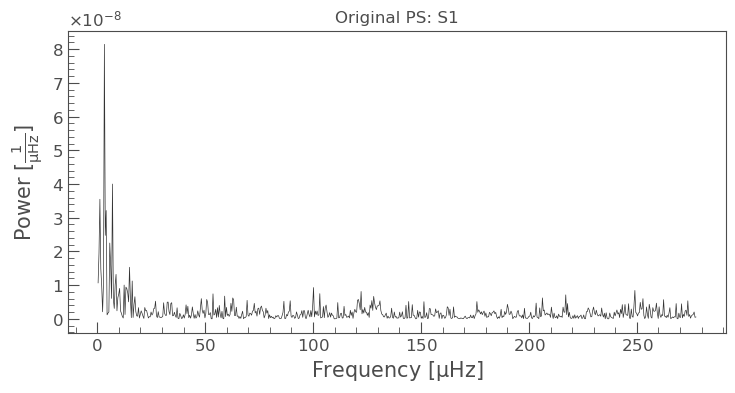

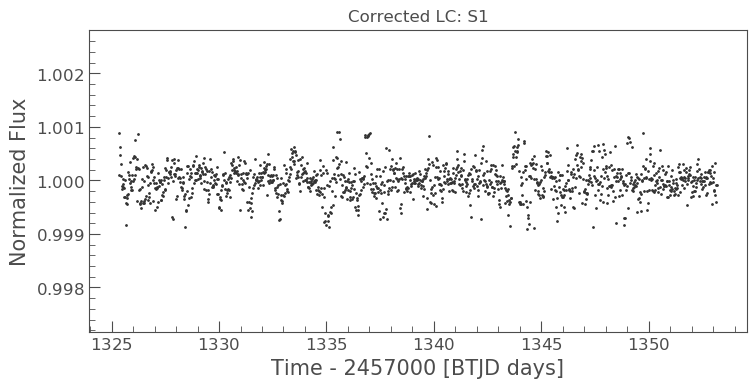

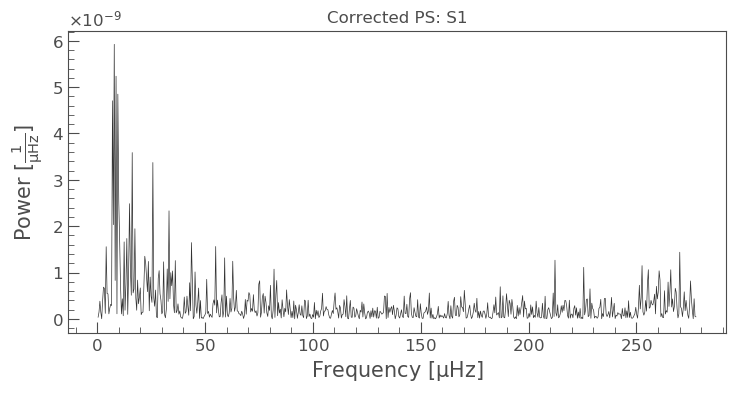

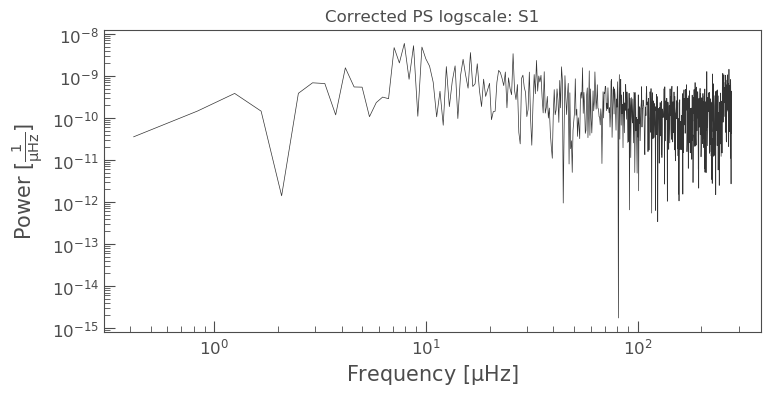

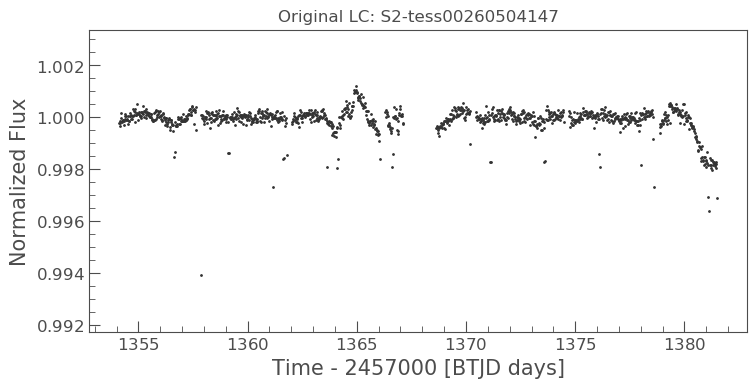

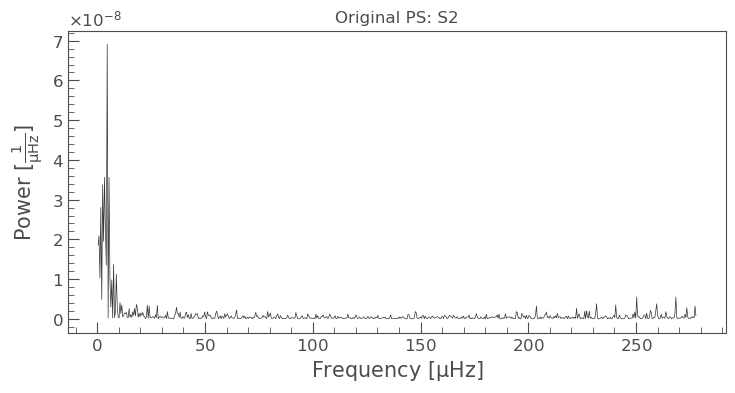

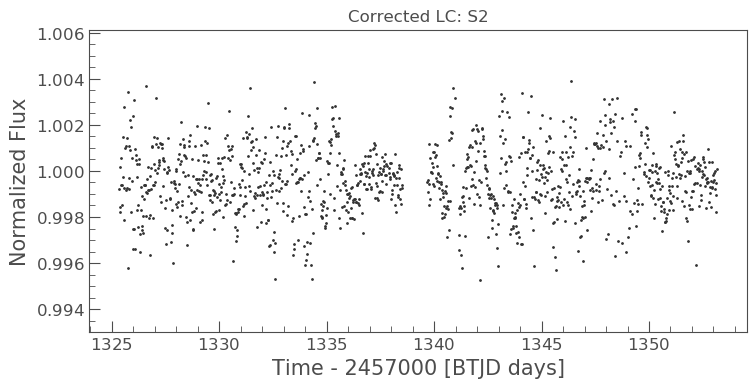

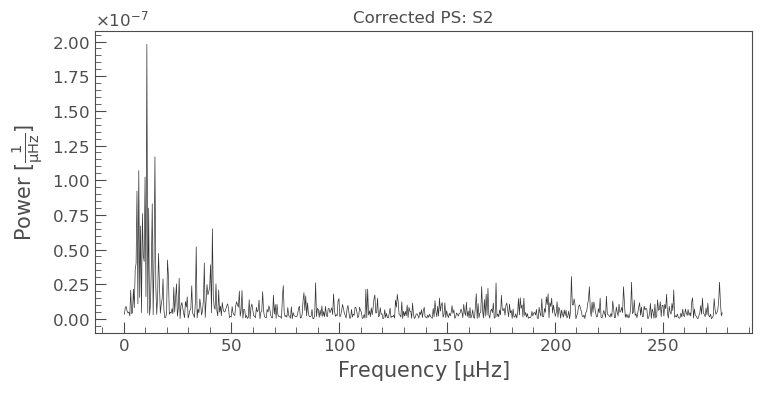

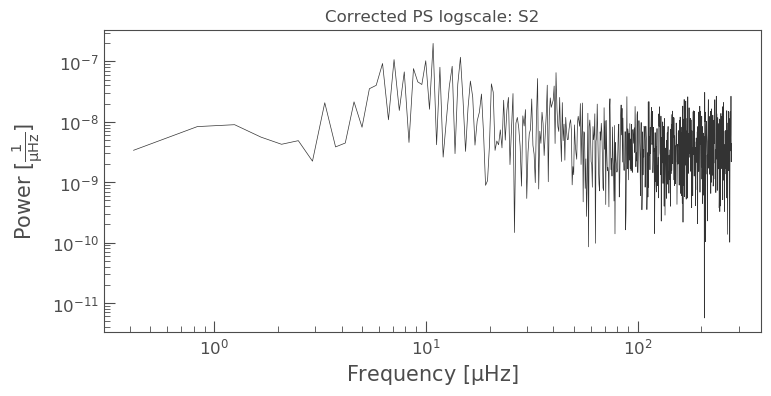

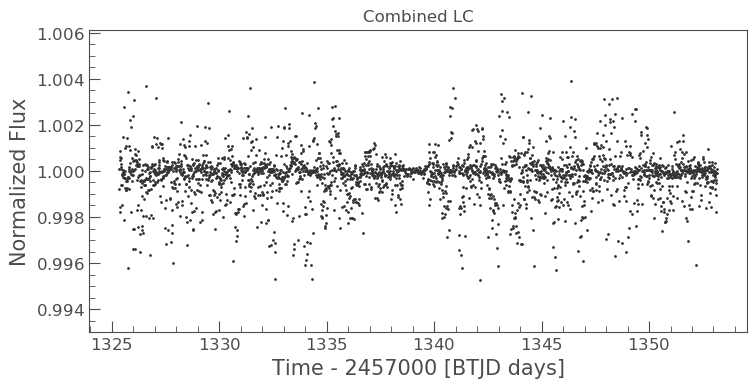

Text(0.5, 1.0, 'Combined Power Logged')

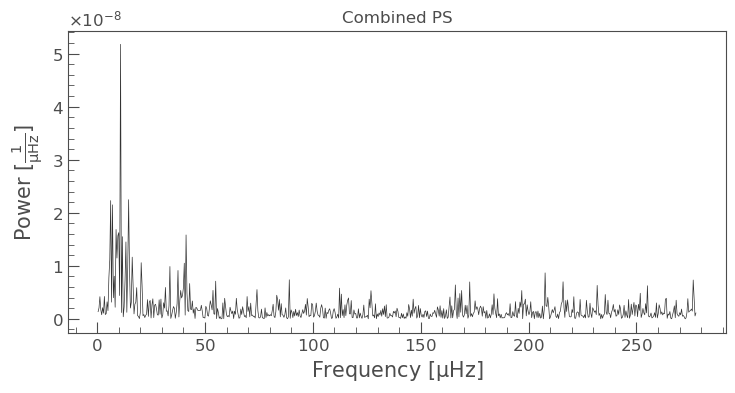

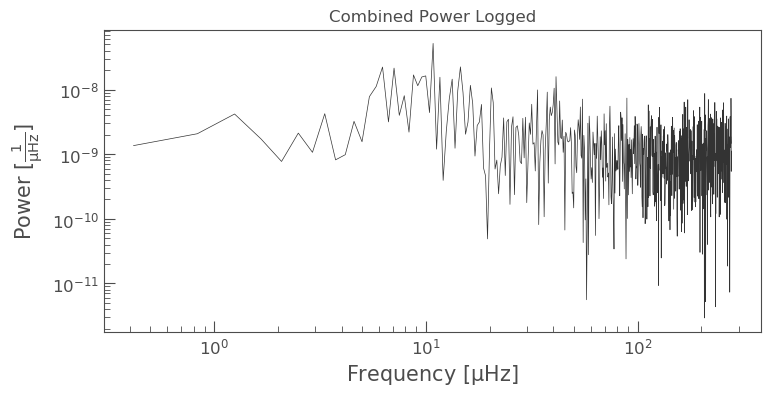

In [101]:
#SECTOR 1
#having difficulties at the moment, need to come back
#cs = ((time11 > 1347) & (time11 < 1350))
#flux11[cs] = np.median(flux11)


model11 = lk.TessLightCurve(time11,flux11,centroid_col = cent112, centroid_row = cent111, cadenceno=cado11).normalize().remove_nans().remove_outliers().flatten(window_length=145)
model11.scatter()
plt.title('Original LC: S1-tess00260504147')
plt.show()
power11 = model11.to_periodogram(method='lombscargle', normalization="psd")
power11.plot()
plt.title('Original PS: S1')
plt.show()

corrected_lc11 = model11.to_corrector("sff").correct(windows=10).remove_outliers(sigma_upper=3, sigma_lower=3).fill_gaps()
corrected_lc11.scatter()
plt.title('Corrected LC: S1')
plt.show()
corr_power11 =corrected_lc11.to_periodogram(method='lombscargle', normalization="psd")
corr_power11.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power11.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



#SECTOR 2

model12 = lk.TessLightCurve(time12,flux12, centroid_col = cent122, centroid_row = cent121, cadenceno=cado12).normalize().remove_nans().remove_outliers().flatten(window_length=145)
model12.scatter()
plt.title('Original LC: S2-tess00260504147')
plt.show()
power12 = model12.to_periodogram(method='lombscargle', normalization="psd")
power12.plot()
plt.title('Original PS: S2')
plt.show()

corrected_lc12 = model3.to_corrector("sff").correct(windows=10).remove_outliers(sigma_upper=3, sigma_lower=3)#.fill_gaps()
corrected_lc12.scatter()
plt.title('Corrected LC: S2')
corr_power12 =corrected_lc12.to_periodogram(method='lombscargle', normalization="psd")
corr_power12.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power12.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined6 = corrected_lc11.append(corrected_lc12)
#combined6 = combined6.fold(period=27)
combined6.scatter()
plt.title('Combined LC')
plt.show()
combined_power6 = combined6.to_periodogram(method='lombscargle', normalization="psd")
combined_power6.plot()
plt.title('Combined PS')
combined_power6.plot(scale='log')
plt.title('Combined Power Logged')

#Missing parameters in databases, so cannot estimate v_max, TASOC-Red Clump, so may not be a viable option for us
#Not seeing any oscillations 

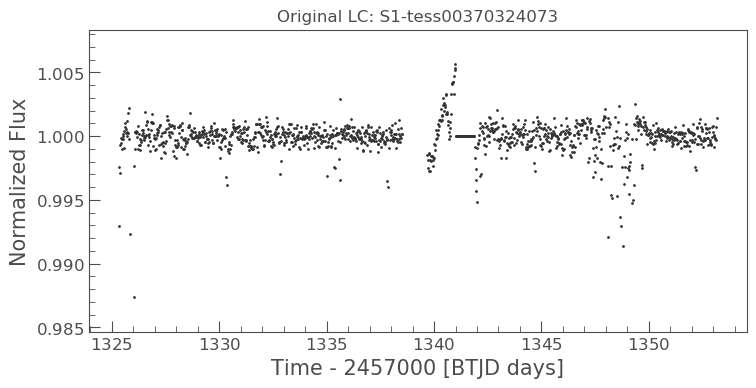

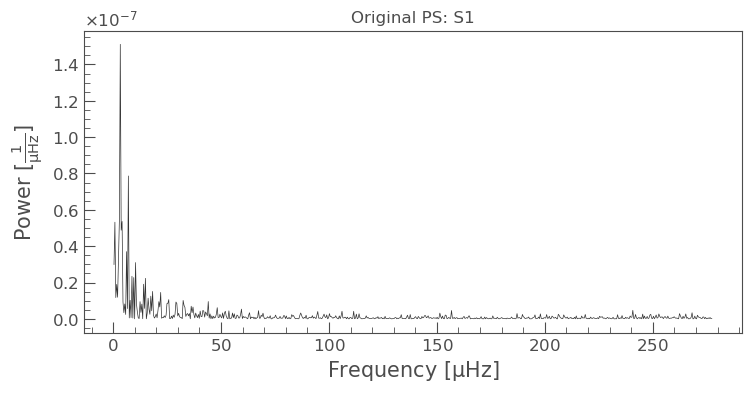

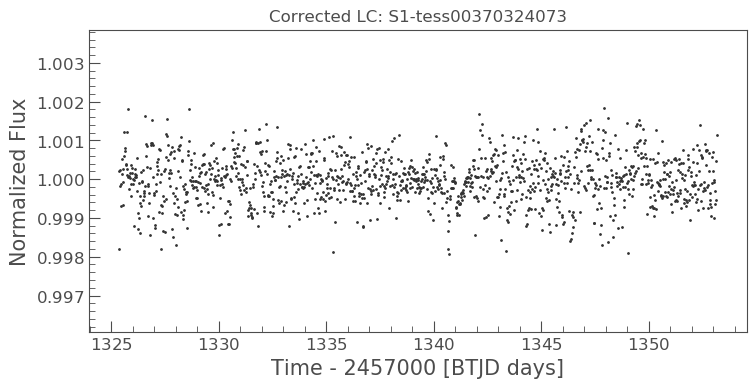

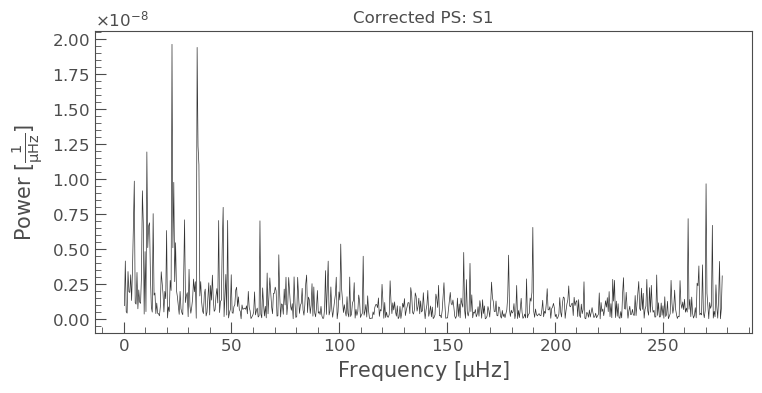

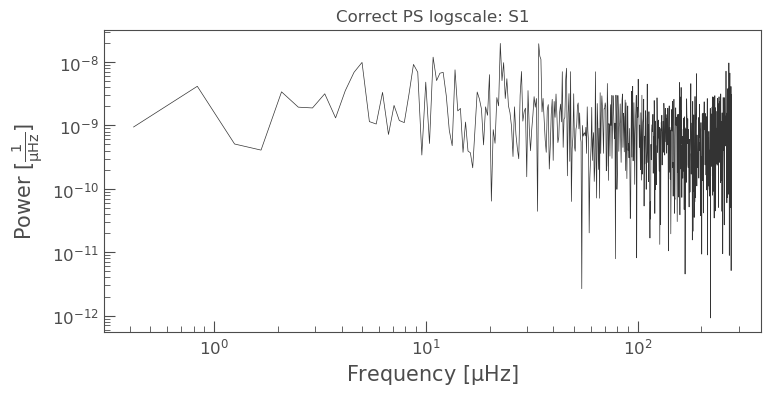

In [52]:
css = ((time13 > 1347) & (time13 < 1350) & (time13 > 1325) & (time13 < 1326))
css |= ((time13 > 1341) & (time13 < 1342))
flux13[css] = np.mean(flux13)

model13 = lk.TessLightCurve(time13,flux13,centroid_col = cent132, centroid_row = cent131, cadenceno=cado13).normalize().remove_nans().remove_outliers().flatten(window_length=145)
model13.scatter()
plt.title('Original LC: S1-tess00370324073')
plt.show()
power13 = model11.to_periodogram(method='lombscargle', normalization="psd")
power13.plot()
plt.title('Original PS: S1')
plt.show()

corrected_lc13 = model13.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc13.scatter()
plt.title('Corrected LC: S1-tess00370324073')
corr_power13 =corrected_lc13.to_periodogram(method='lombscargle', normalization="psd")
corr_power13.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power13.plot(scale='log')
plt.title('Correct PS logscale: S1')
plt.show()

#with estimated calculations: v_max ~ 2798 microhertz, not a candidate for us


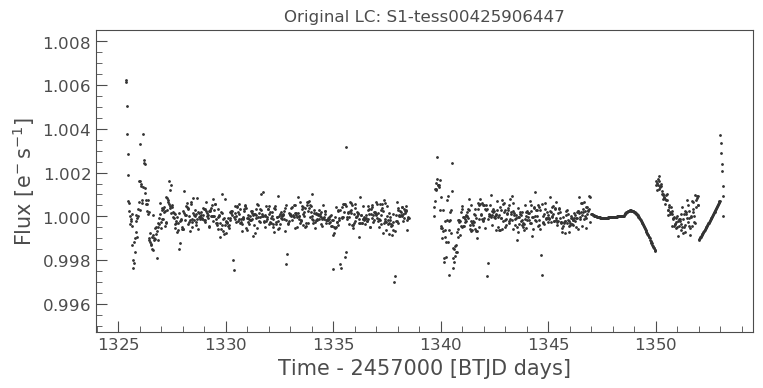

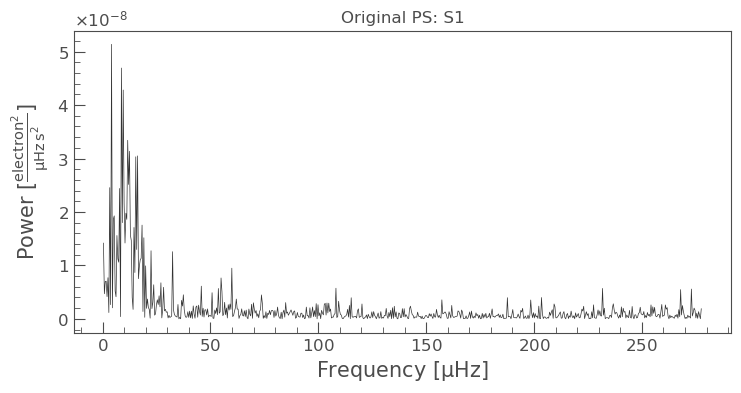

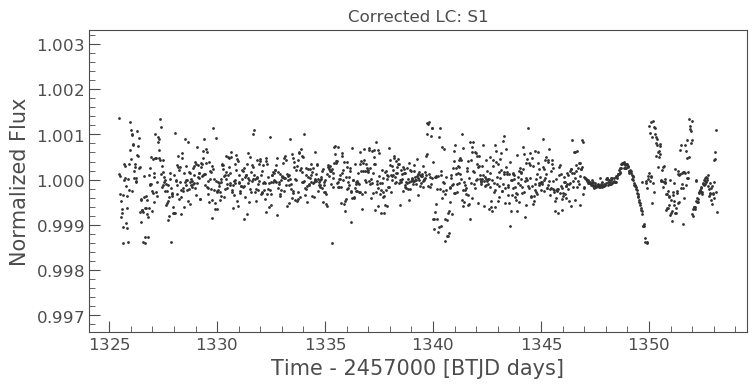

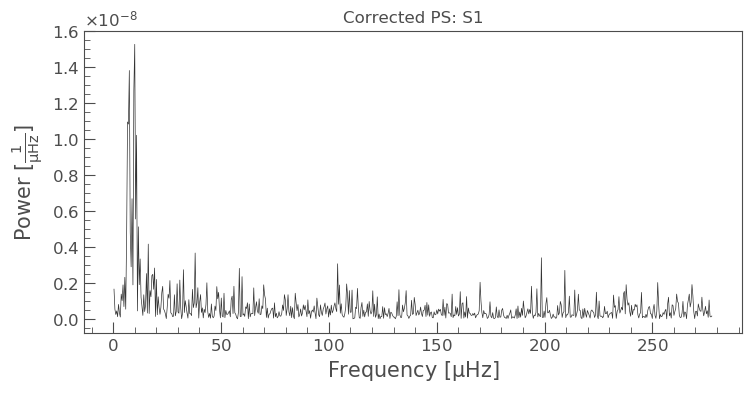

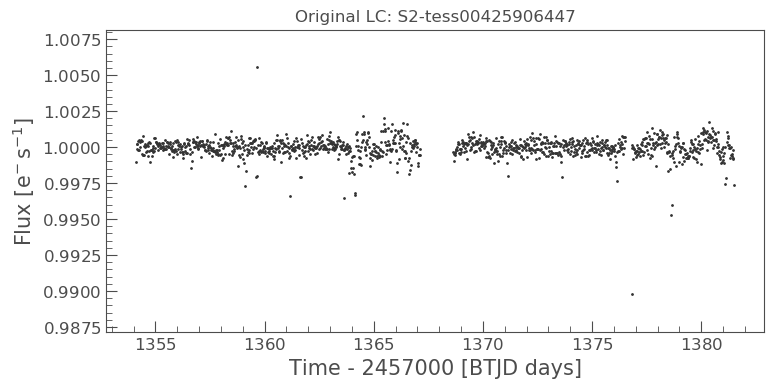

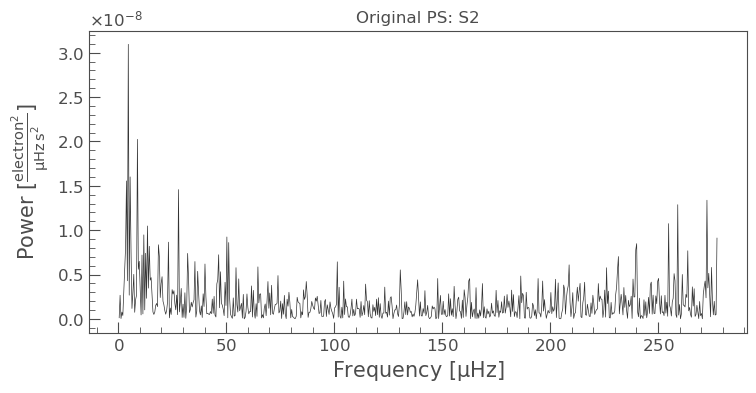

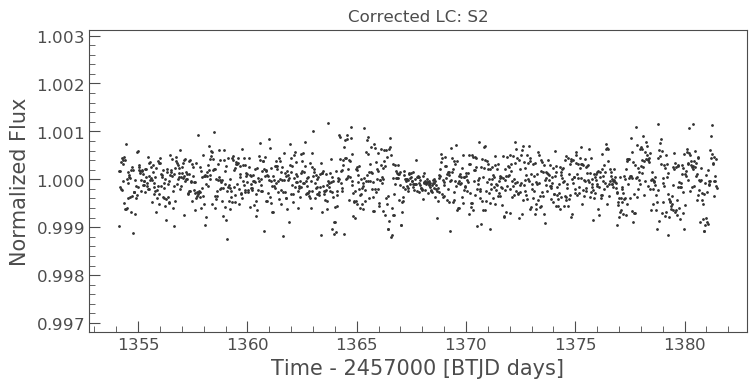

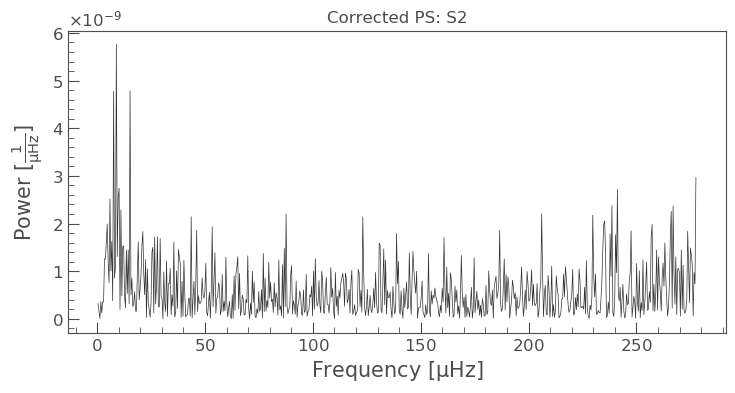

Text(0.5, 1.0, 'Combined Power Logged')

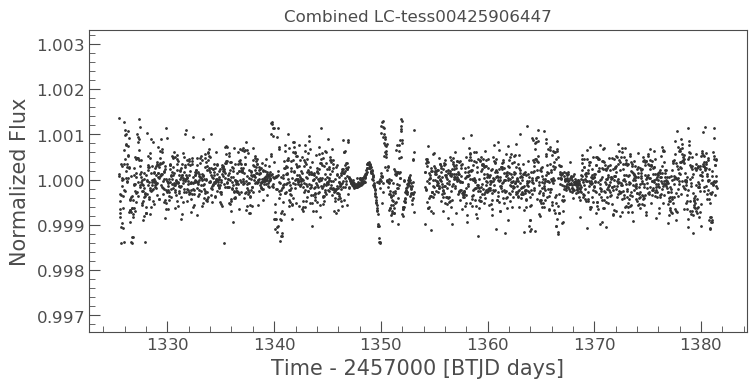

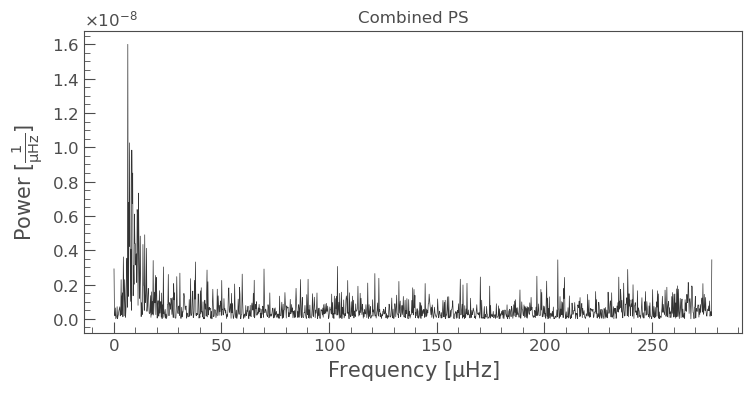

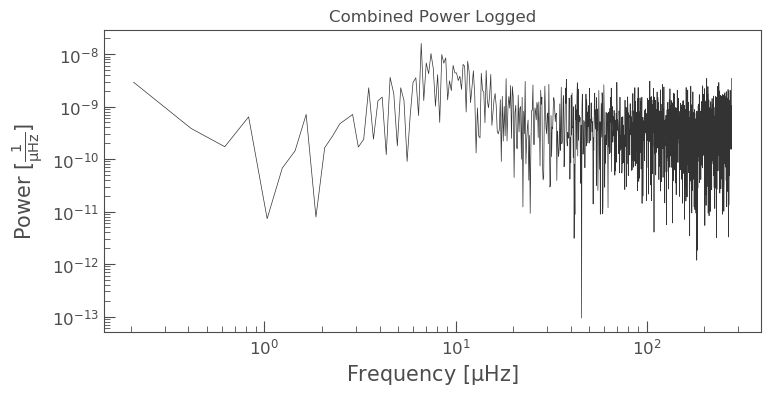

In [53]:
#SECTOR 1
cssss= ((time14 > 1347) & (time14 < 1350))
cssss |= ((time14 >1352) & (time14 <1353))
flux14[cssss] = np.median(flux14)

model14 = lk.TessLightCurve(time14,flux14,centroid_col = cent142, centroid_row = cent141, cadenceno=cado14).remove_nans().remove_outliers().flatten(window_length=145)
model14.scatter()
plt.title('Original LC: S1-tess00425906447')
plt.show()
power14 = model14.to_periodogram(method='lombscargle', normalization="psd")
power14.plot()
plt.title('Original PS: S1')
plt.show()


corrected_lc14 = model14.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc14.scatter()
plt.title('Corrected LC: S1')
corr_power14 =corrected_lc14.to_periodogram(method='lombscargle', normalization="psd")
corr_power14.plot()
plt.title('Corrected PS: S1')
plt.show()


model15 = lk.TessLightCurve(time15,flux15, centroid_col = cent152, centroid_row = cent151, cadenceno=cado15).remove_nans().remove_outliers().flatten(window_length=145)
model15.scatter()
plt.title('Original LC: S2-tess00425906447')
plt.show()
power15 = model15.to_periodogram(method='lombscargle', normalization="psd")
power15.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc15 = model15.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc15.scatter()
plt.title('Corrected LC: S2')
corr_power15 =corrected_lc15.to_periodogram(method='lombscargle', normalization="psd")
corr_power15.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined7 = corrected_lc14.append(corrected_lc15)
#combined7 = combined7.fold(period=27)
combined7.scatter()
plt.title('Combined LC-tess00425906447')
combined_power7 = combined7.to_periodogram(method='lombscargle', normalization="psd")
combined_power7.plot()
plt.title('Combined PS')
combined_power7.plot(scale='log')
plt.title('Combined Power Logged')

#with estimated calculations: v_max ~ 1172 microhertz, not a candidate for us

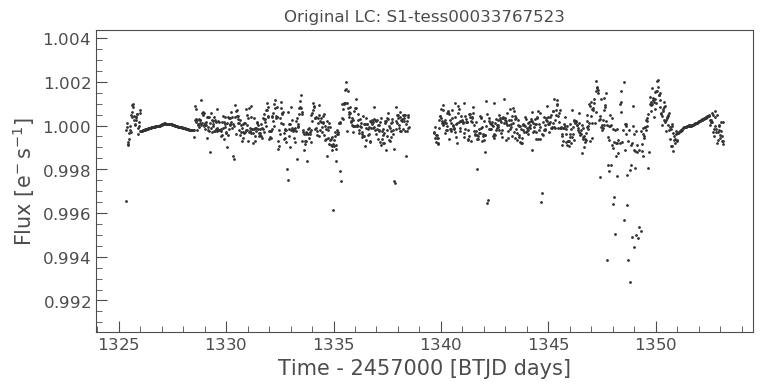

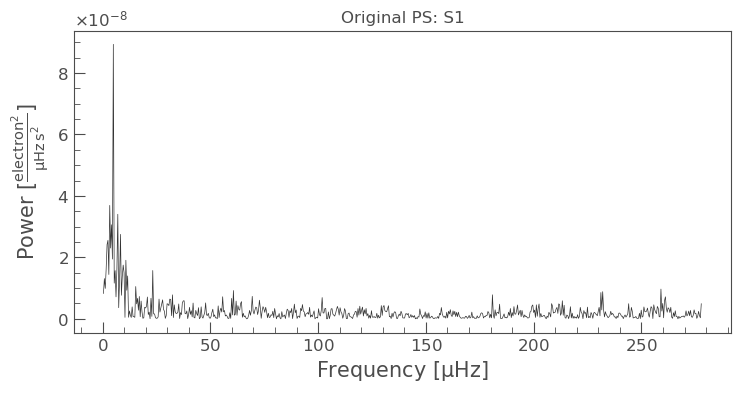

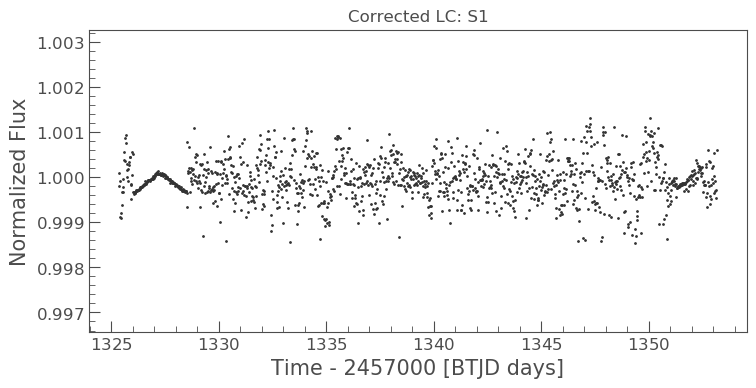

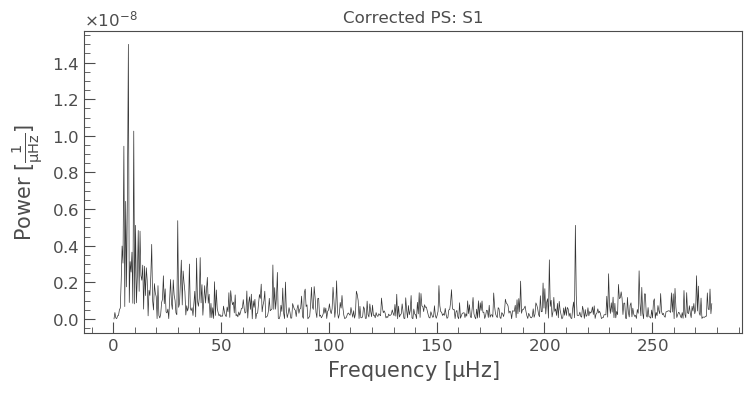

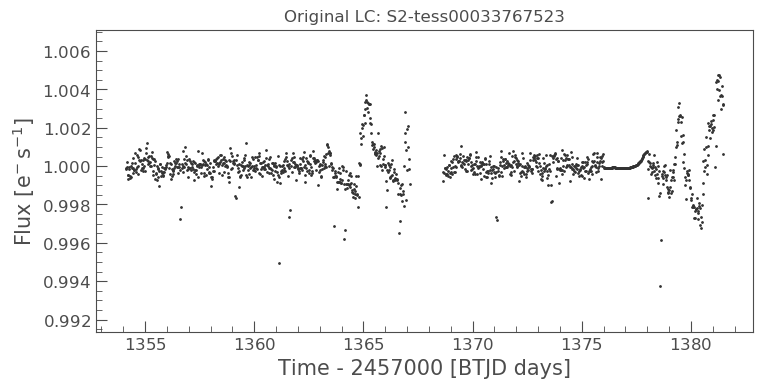

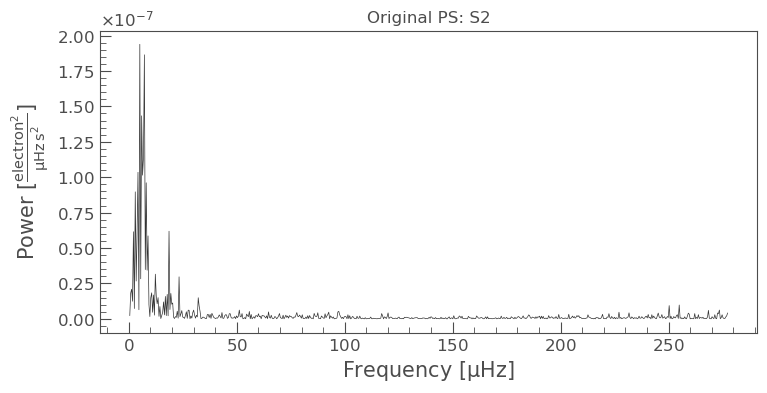

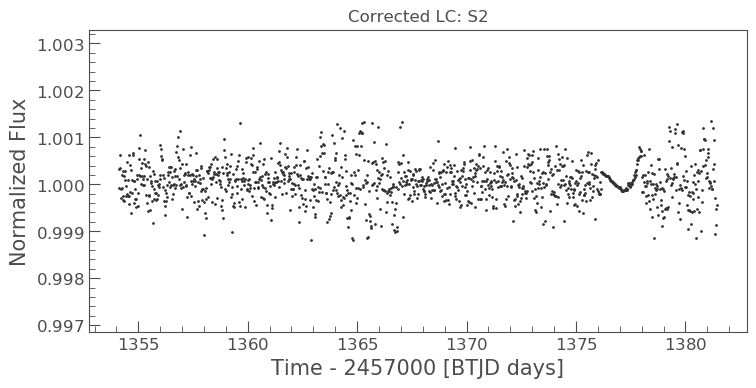

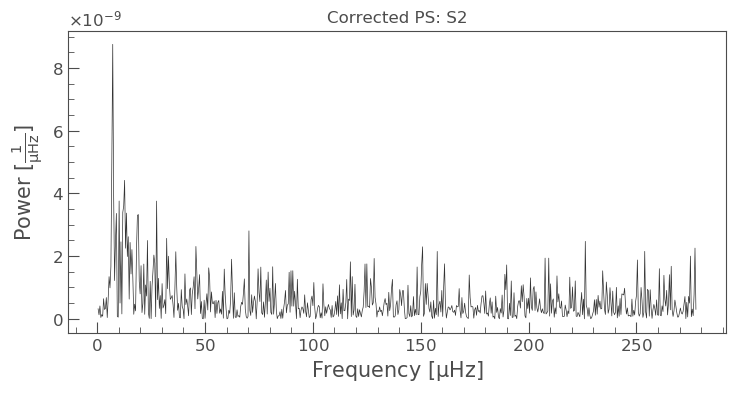

Text(0.5, 1.0, 'Combined Power Logged')

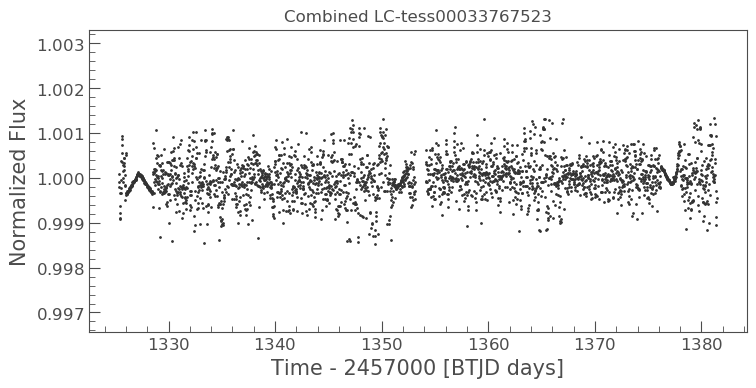

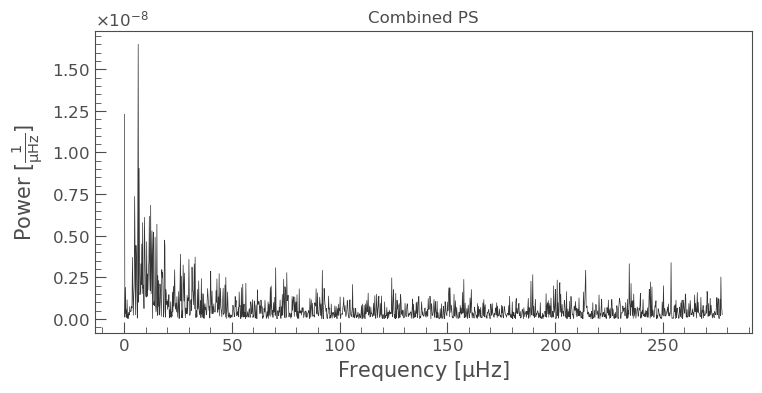

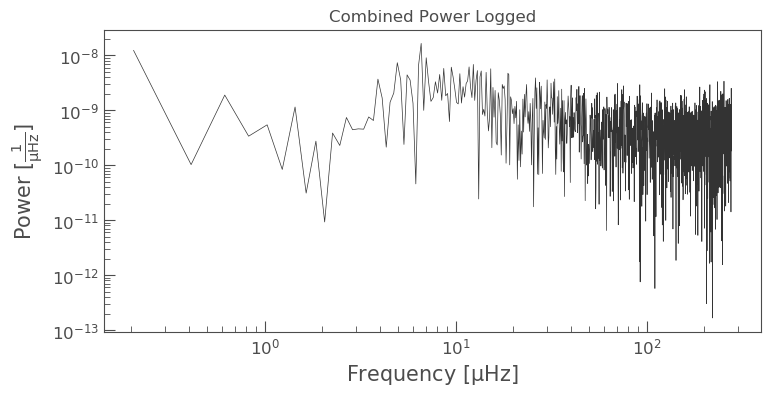

In [54]:
#SECTOR 1
#cds = ((time16 > 1347) & (time16 < 1350))
cds = ((time16 > 1326) & (time16 < 1328.5))
cds |= ((time16 > 1351) & (time16 < 1352.5))
flux16[cds] = np.median(flux16)

model16 = lk.TessLightCurve(time16,flux16,centroid_col = cent162, centroid_row = cent161, cadenceno=cado16).remove_nans().remove_outliers().flatten(window_length=145)
model16.scatter()
plt.title('Original LC: S1-tess00033767523')
plt.show()
power16 = model16.to_periodogram(method='lombscargle', normalization="psd")
power16.plot()
plt.title('Original PS: S1')
plt.show()


corrected_lc16 = model16.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc16.scatter()
plt.title('Corrected LC: S1')
corr_power16 =corrected_lc16.to_periodogram(method='lombscargle', normalization="psd")
corr_power16.plot()
plt.title('Corrected PS: S1')
plt.show()


#SECTOR 2
cdss = ((time17 > 1376) & (time17 < 1378))
flux17[cdss] = np.median(flux17)

model17 = lk.TessLightCurve(time17,flux17, centroid_col = cent172, centroid_row = cent171, cadenceno=cado17).remove_nans().remove_outliers().flatten(window_length=145)
model17.scatter()
plt.title('Original LC: S2-tess00033767523')
plt.show()
power17 = model17.to_periodogram(method='lombscargle', normalization="psd")
power17.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc17 = model17.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc17.scatter()
plt.title('Corrected LC: S2')
corr_power17 =corrected_lc17.to_periodogram(method='lombscargle', normalization="psd")
corr_power17.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined8 = corrected_lc16.append(corrected_lc17)
#combined8 = combined8.fold(period = 27)
#combined8.remove_outliers(sigma_lower = 2)
combined8.scatter()
plt.title('Combined LC-tess00033767523')
combined_power8 = combined8.to_periodogram(method='lombscargle', normalization="psd")
combined_power8.plot()
plt.title('Combined PS')
combined_power8.plot(scale='log')
plt.title('Combined Power Logged')


##with estimated calculations: v_max ~ 126 microhertz

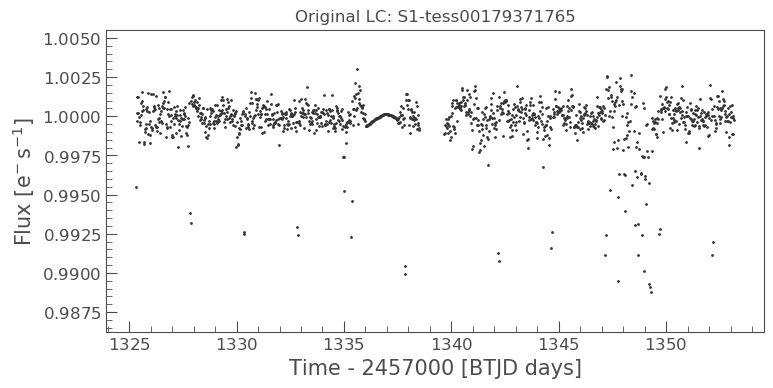

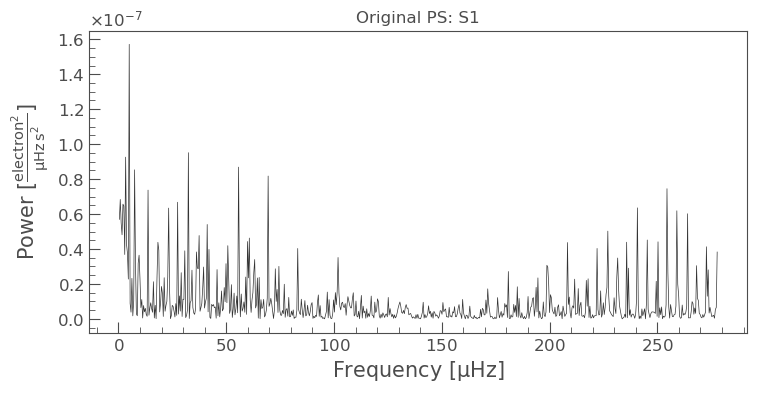

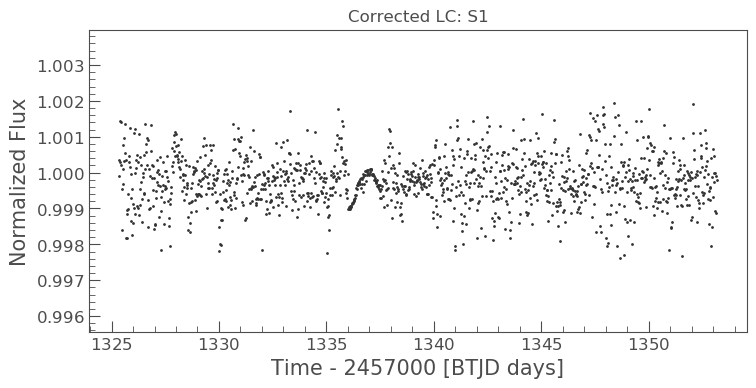

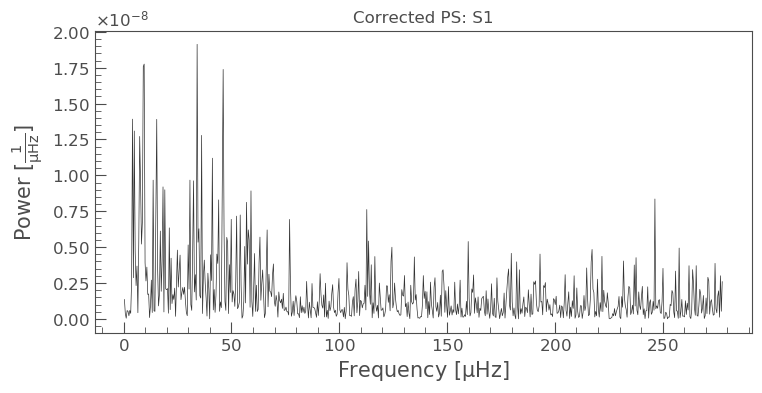

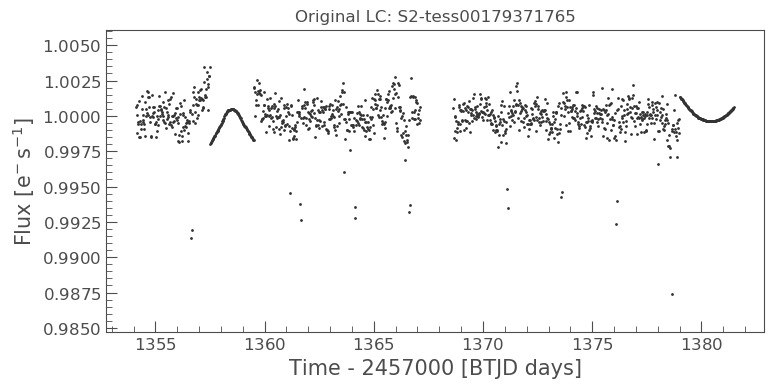

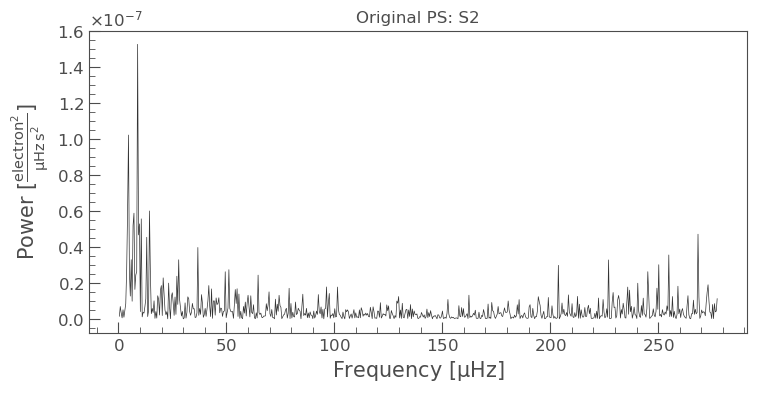

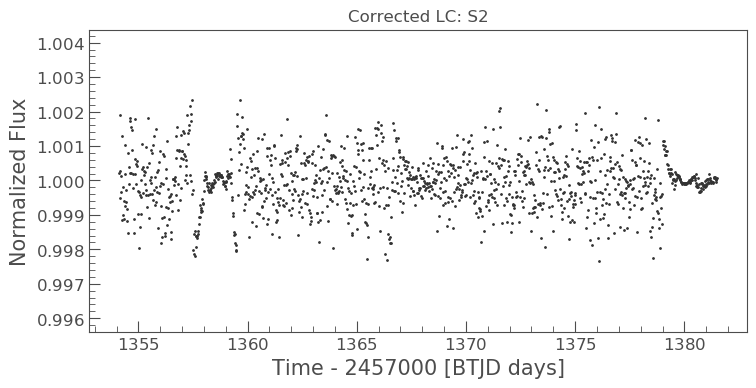

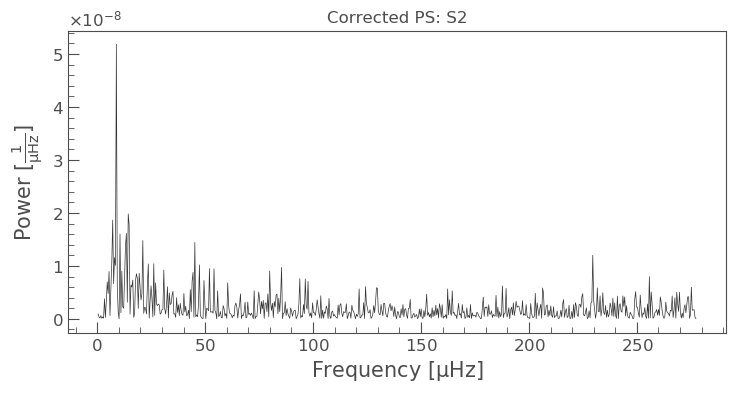

Text(0.5, 1.0, 'Combined Power Logged')

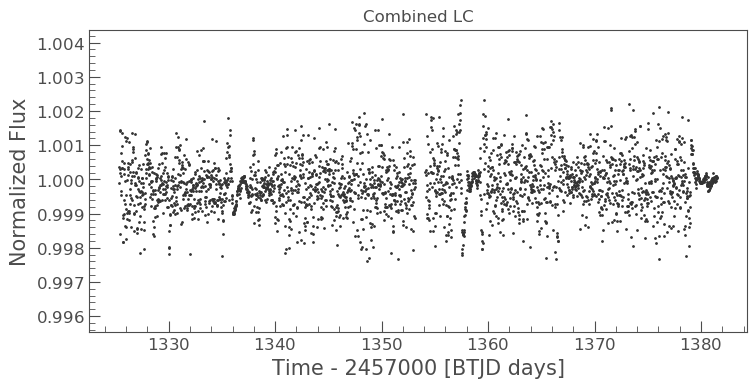

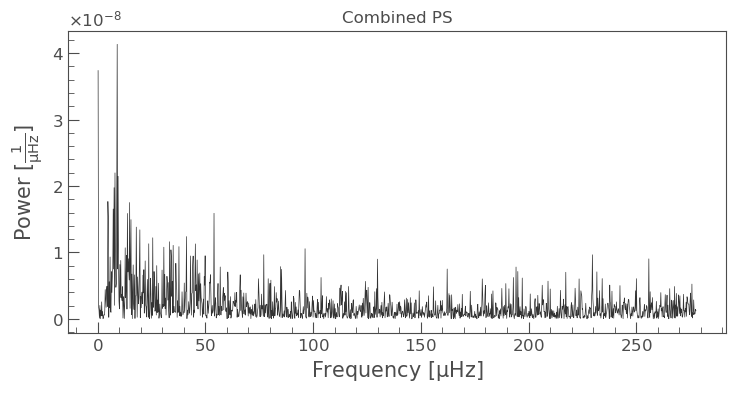

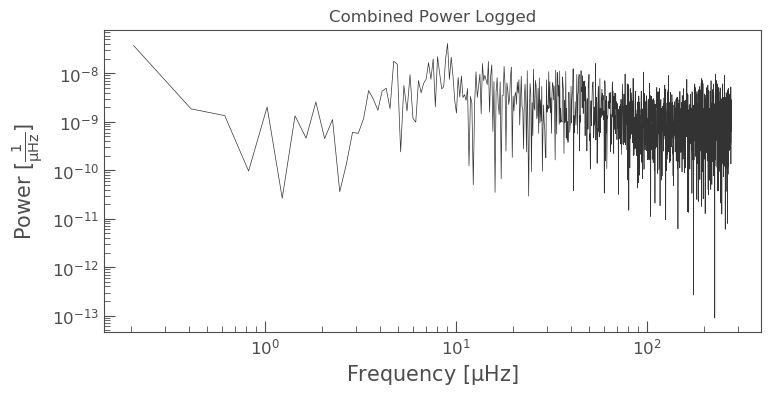

In [85]:
#SECTOR 1
#c18s = ((time18 > 1347) & (time18 < 1350))
c18s = ((time18 > 1336) & (time18 < 1337.5))
flux18[c18s] = np.median(flux18)

model18 = lk.TessLightCurve(time18,flux18,centroid_col = cent182, centroid_row = cent181, cadenceno=cado18).remove_nans().remove_outliers().flatten(window_length=145)
model18.scatter()
plt.title('Original LC: S1-tess00179371765')
plt.show()
power18 = model18.to_periodogram(method='lombscargle', normalization="psd")
power18.plot()
plt.title('Original PS: S1')
plt.show()


corrected_lc18 = model18.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc18.scatter()
plt.title('Corrected LC: S1')
corr_power18 =corrected_lc18.to_periodogram(method='lombscargle', normalization="psd")
corr_power18.plot()
plt.title('Corrected PS: S1')
plt.show()

#SECTOR 2
c19s = ((time19 > 1357.5) & (time19 < 1359.5))
c19s |= ((time19 > 1379) & (time19 < 1382))
flux19[c19s] = np.median(flux19)

model19 = lk.TessLightCurve(time19,flux19, centroid_col = cent192, centroid_row = cent191, cadenceno=cado19).remove_nans().remove_outliers().flatten(window_length=145)
model19.scatter()
plt.title('Original LC: S2-tess00179371765')
plt.show()
power19 = model19.to_periodogram(method='lombscargle', normalization="psd")
power19.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc19 = model19.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc19.scatter()
plt.title('Corrected LC: S2')
corr_power19 =corrected_lc19.to_periodogram(method='lombscargle', normalization="psd")
corr_power19.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined9 = corrected_lc18.append(corrected_lc19)
#combined9 = combined9.fold(period = 27)
#combined9.remove_outliers(sigma_lower = 3)
combined9.scatter()
plt.title('Combined LC')
combined_power9 = combined9.to_periodogram(method='lombscargle', normalization="psd")
combined_power9.plot()
plt.title('Combined PS')
combined_power9.plot(scale='log')
plt.title('Combined Power Logged')


#With estimated calculations, v_maz ~129.4

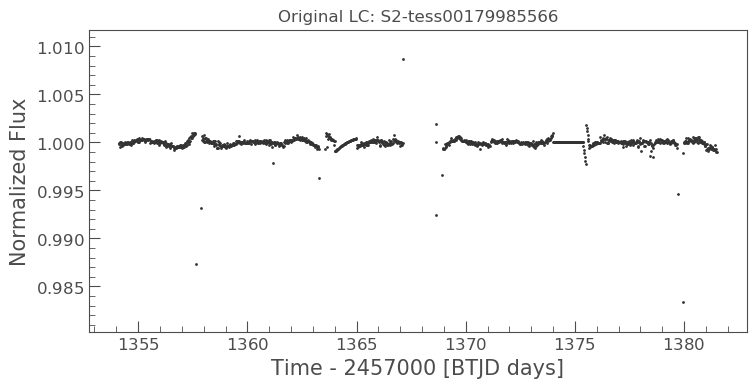

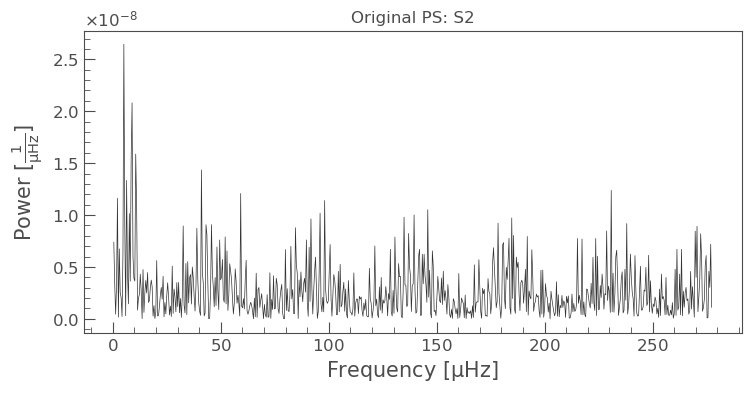

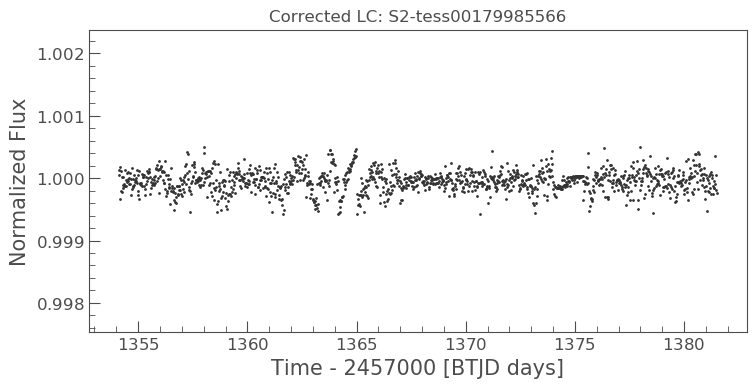

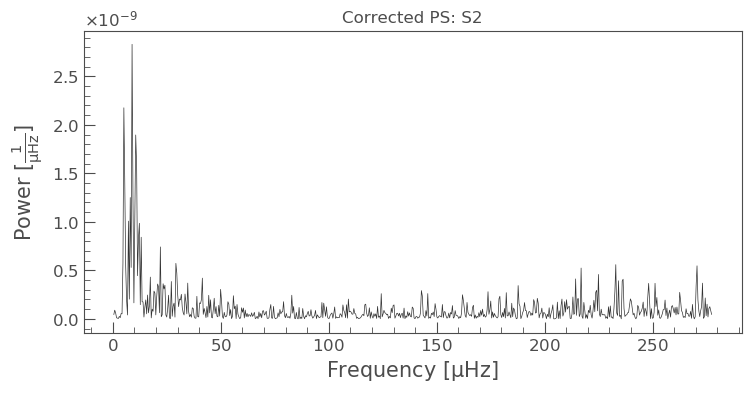

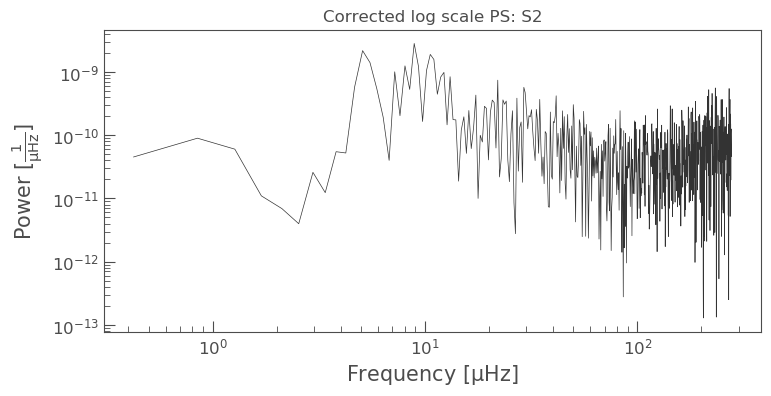

In [69]:
c20s = ((time20 > 1364) & (time20 < 1365))
c20s |= ((time20 > 1374) & (time20 < 1375.5))
flux20[c20s] = np.median(flux20)

model20 = lk.TessLightCurve(time20,flux20,centroid_col = cent202, centroid_row = cent201, cadenceno=cado20).normalize().remove_nans().remove_outliers().flatten(window_length=145)
model20.scatter()
plt.title('Original LC: S2-tess00179985566')
plt.show()
power20 = model20.to_periodogram(method='lombscargle', normalization="psd")
power20.plot()
plt.title('Original PS: S2')
plt.show()


corrected_lc20 = model20.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc20.scatter()


#c20ss = ((corrected_lc20.time > 1357) & (corrected_lc20.time < 1358))
#c20ss |= ((corrected_lc20.time > 1367) & (corrected_lc20.time < 1369))
#corrected_lc20.flux[c20ss] = np.median(corrected_lc20.flux)

plt.title('Corrected LC: S2-tess00179985566')
corr_power20 =corrected_lc20.to_periodogram(method='lombscargle', normalization="psd")
corr_power20.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power20.plot(scale='log')
plt.title('Corrected log scale PS: S2')
plt.show()

#with estimated calculations v_max ~ 1328 microHz, a TASOC red clump member, not a viable candidate for us

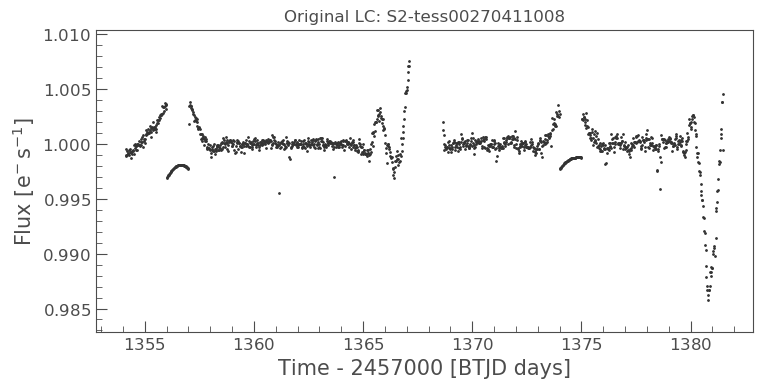

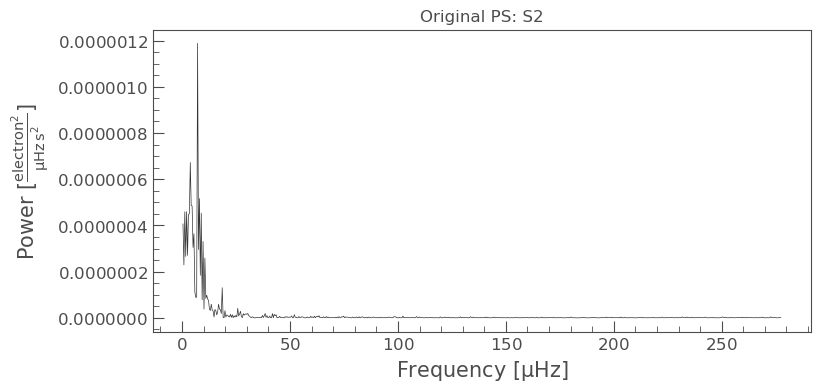

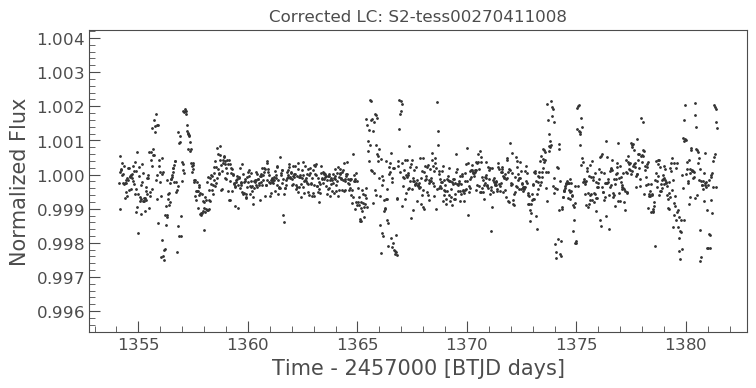

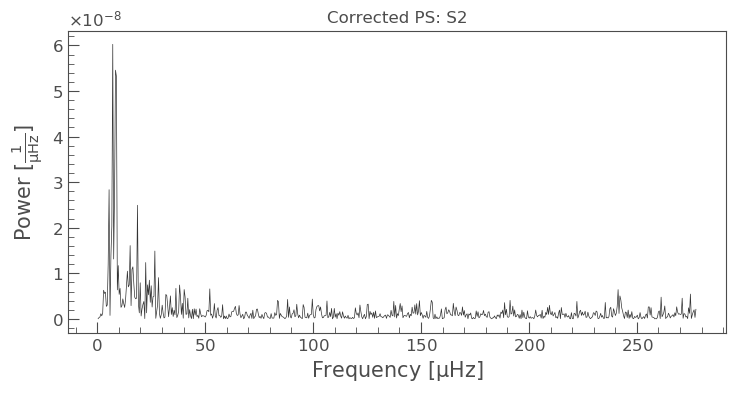

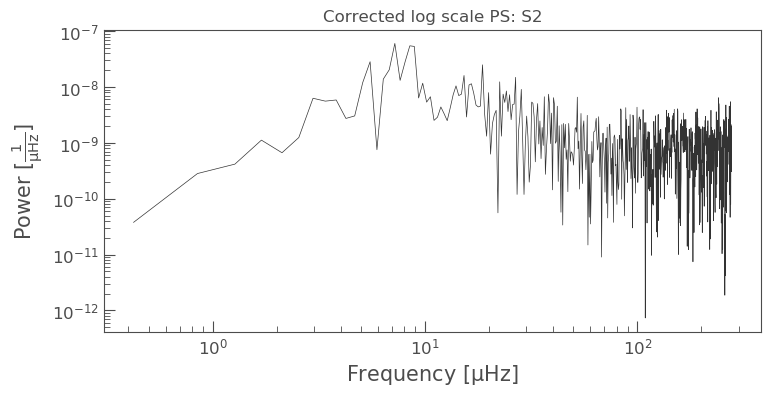

In [70]:
c21s = ((time21 > 1356) & (time21 < 1357))
c21s |= ((time21 > 1374) & (time21 < 1375))
flux21[c21s] = np.median(flux21)

model21 = lk.TessLightCurve(time21,flux21, centroid_col = cent212, centroid_row = cent211, cadenceno=cado21).remove_nans().remove_outliers().flatten(window_length=145)
model21.scatter()
plt.title('Original LC: S2-tess00270411008')
plt.show()
power21 = model21.to_periodogram(method='lombscargle', normalization="psd")
power21.plot()
plt.title('Original PS: S2')
plt.show()

#corrector21 = model21.remove_nans().to_corrector()
#corrected_lc21 = corrector21.correct()
corrected_lc21 = model21.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc21.scatter()


#condition = ((corrected_lc21.time > 1380))
#condition |= ((corrected_lc21.time > 1365) & (corrected_lc21.time < 1367))
#corrected_lc21.flux[condition] = np.median(corrected_lc21.flux)


plt.title('Corrected LC: S2-tess00270411008')
corr_power21 =corrected_lc21.to_periodogram(method='lombscargle', normalization="psd")
corr_power21.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power21.plot(scale='log')
plt.title('Corrected log scale PS: S2')
plt.show()

#With estimated calculations v_max ~ 2010 microHz, TESS Target List. Not a viable candidate for us

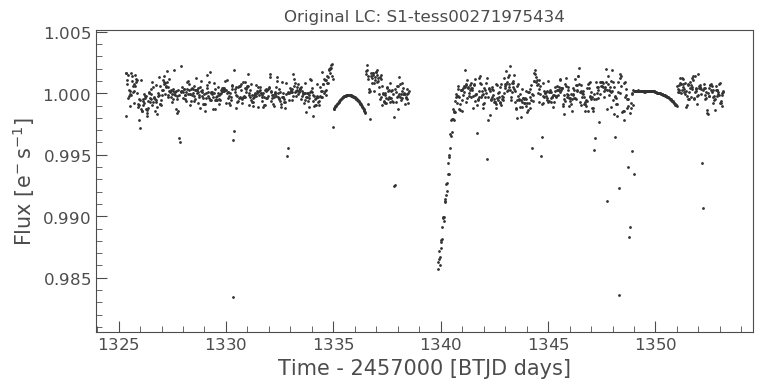

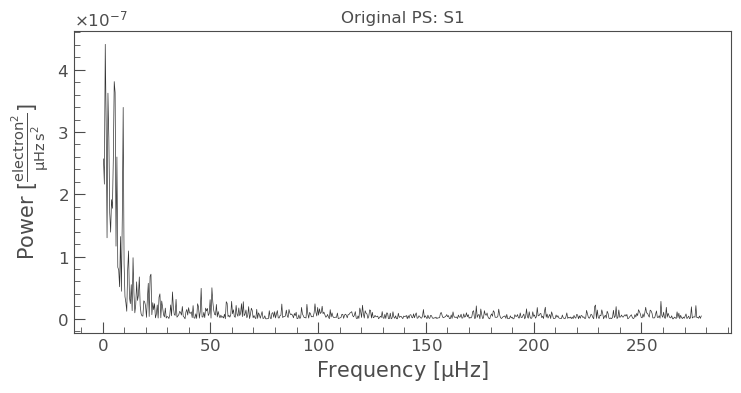

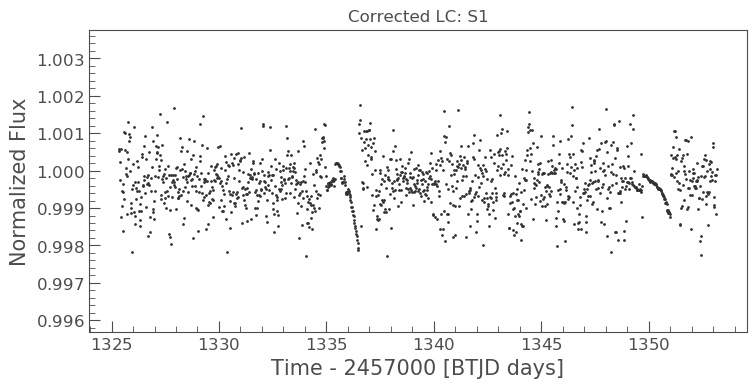

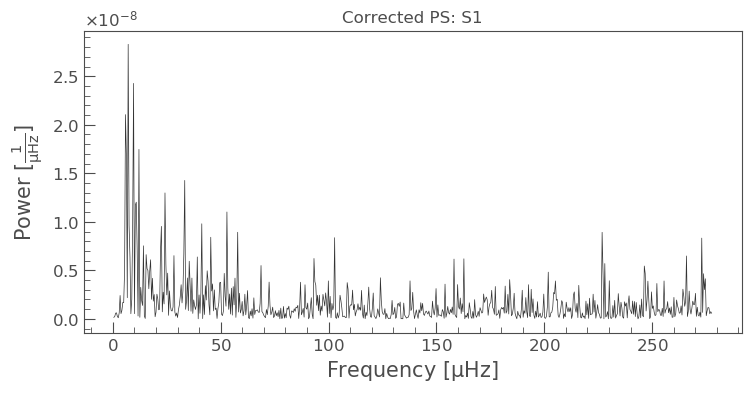

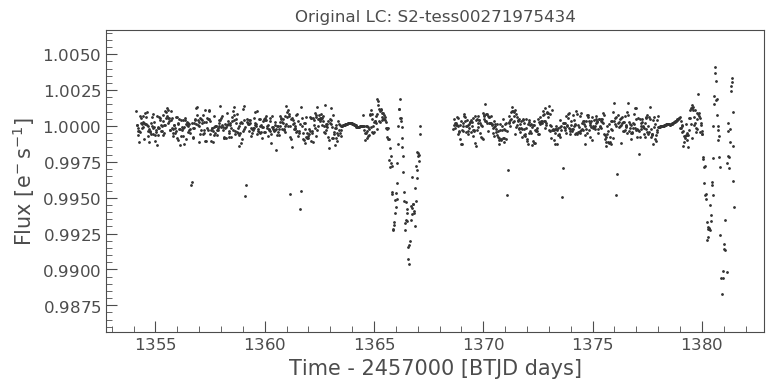

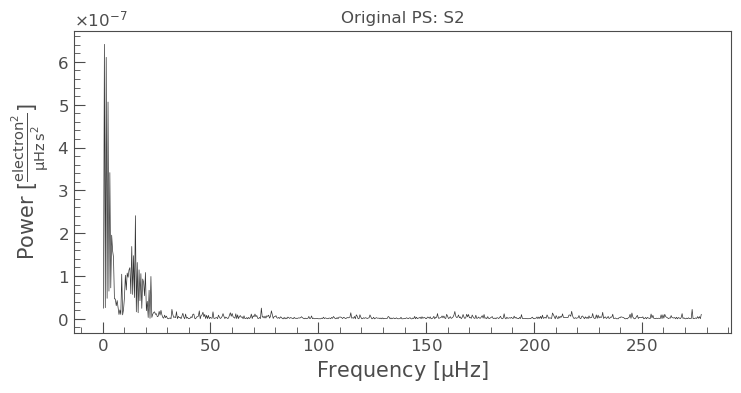

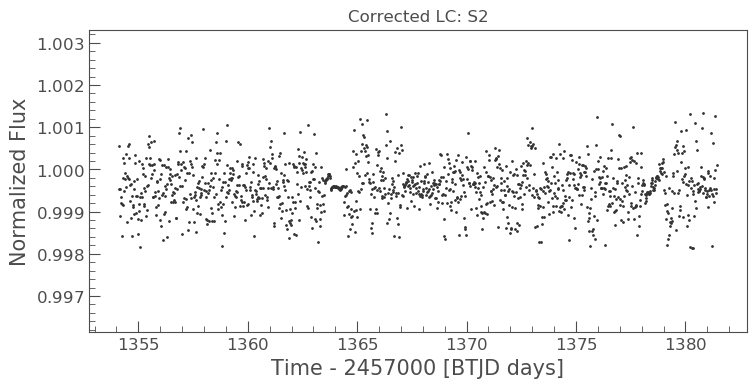

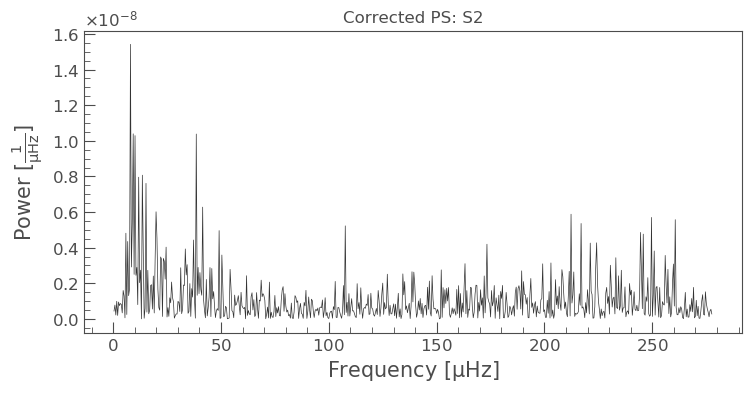

Text(0.5, 1.0, 'Combined Power Logged')

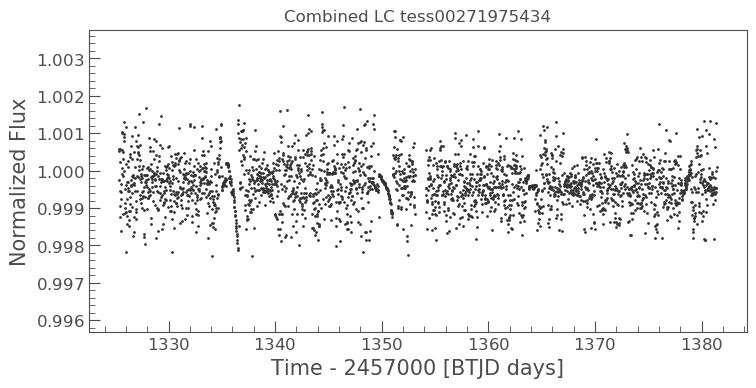

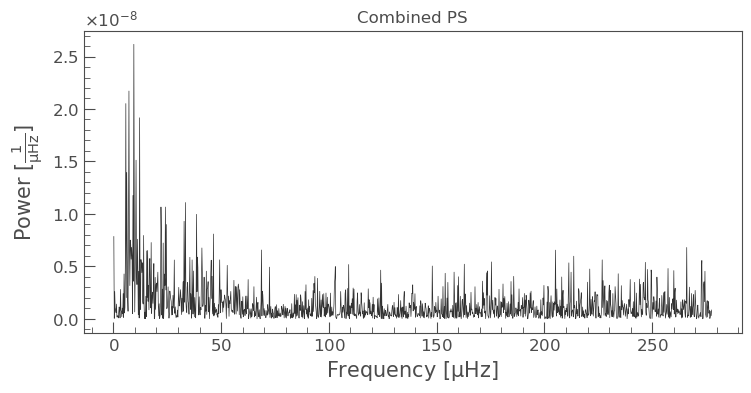

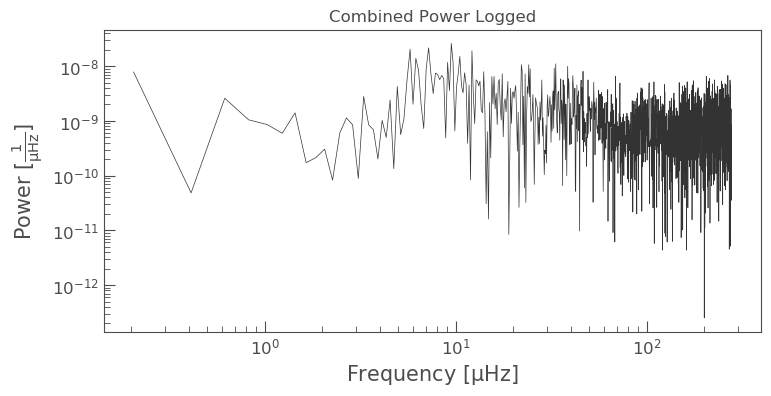

In [71]:
c22s= ((time22 > 1349) & (time22 < 1351))
c22s |= ((time22 > 1335) & (time22 < 1336.5))
flux22[c22s] = np.median(flux22)

model22 = lk.TessLightCurve(time22,flux22,centroid_col = cent222, centroid_row = cent221, cadenceno=cado22).remove_nans().remove_outliers().flatten(window_length=145)
model22.scatter()
plt.title('Original LC: S1-tess00271975434')
plt.show()
power22 = model22.to_periodogram(method='lombscargle', normalization="psd")
power22.plot()
plt.title('Original PS: S1')
plt.show()

#corrector22 = model22.remove_nans().to_corrector()
#corrected_lc22 = corrector22.correct()
corrected_lc22 = model22.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc22.scatter()
plt.title('Corrected LC: S1')
corr_power22 =corrected_lc22.to_periodogram(method='lombscargle', normalization="psd")
corr_power22.plot()
plt.title('Corrected PS: S1')
plt.show()

c23s = ((time23 > 1363.5) & (time23 < 1364.5))
c23s |= ((time23 > 1378) & (time23 < 1379))
flux23[c23s] = np.median(flux23)

model23 = lk.TessLightCurve(time23,flux23, centroid_col = cent232, centroid_row = cent231, cadenceno=cado23).remove_nans().remove_outliers().flatten(window_length=145)
model23.scatter()
plt.title('Original LC: S2-tess00271975434')
plt.show()
power23 = model23.to_periodogram(method='lombscargle', normalization="psd")
power23.plot()
plt.title('Original PS: S2')
plt.show()

#corrector23 = model23.remove_nans().to_corrector()
#corrected_lc23 = corrector23.correct()
corrected_lc23 = model23.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=2.5, sigma_upper=3).fill_gaps()
corrected_lc23.scatter()
plt.title('Corrected LC: S2')
corr_power23 =corrected_lc23.to_periodogram(method='lombscargle', normalization="psd")
corr_power23.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined10 = corrected_lc22.append(corrected_lc23)
#combined10 = combined10.fold(period = 30)
combined10.scatter()
plt.title('Combined LC tess00271975434')
combined_power10 = combined10.to_periodogram(method='lombscargle', normalization="psd")
combined_power10.plot()
plt.title('Combined PS')
combined_power10.plot(scale='log')
plt.title('Combined Power Logged')

#With estimated calculation v_max ~ 34 microHz
#There is a gaussian-like 'bump' within the region around 34 microHz, but I am not sure how reliable this is. I am not sure
#if all systematic errors are accounted for and that region has been showing issues in other power spectrums
